# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù & Î®∏Ïã†Îü¨Îãù


### 0.Ï∞∏Í≥† Ïª¨Îüº ÏöîÏïΩ
   Î†àÌçºÎü∞Ïä§:https://dacon.io/competitions/official/236502/talkboard/414017?page=1&dtype=recent
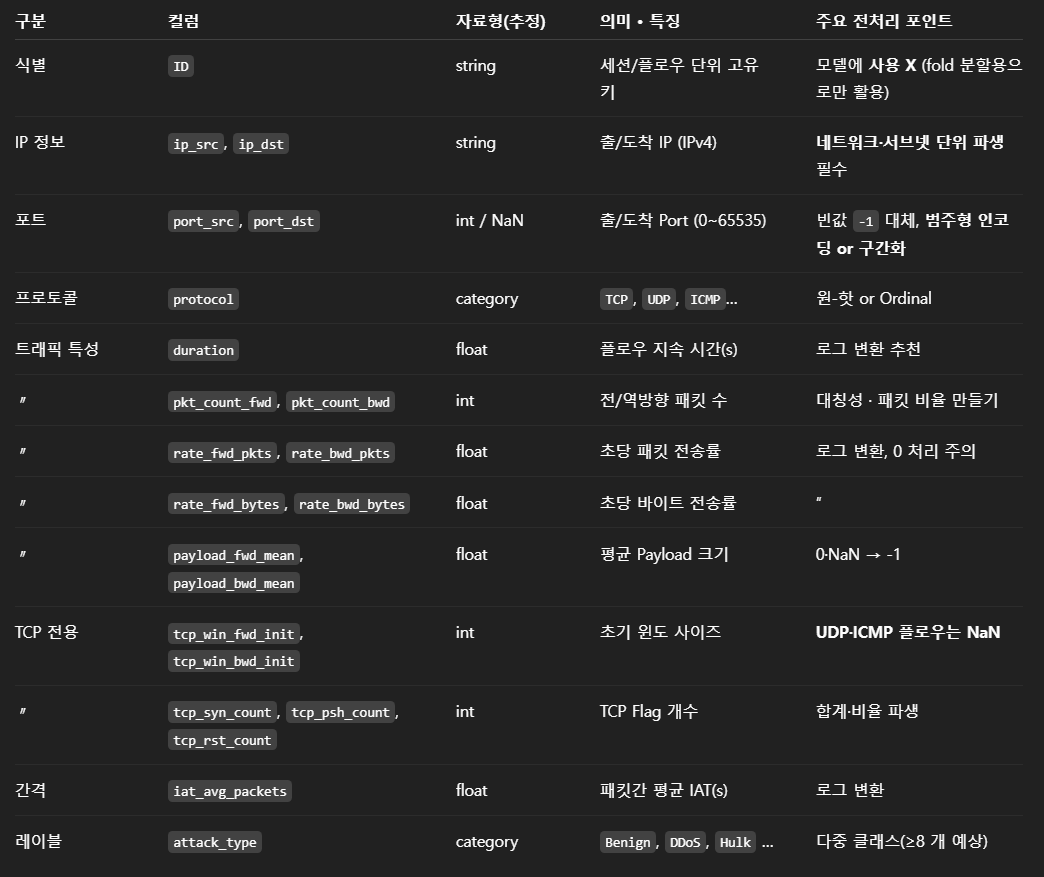

## 1.Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
 1. ÎÇ¥ ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏ ÌõÑ Í≤ΩÎ°ú MyDrive/Îç∞Ïù¥ÏΩò/ ÎÇ¥Î∂ÄÏóêÏÑú Ï∞æÏïÑÏÑú Í≤ΩÎ°ú Ïó∞Îèô


In [1]:
# Ïå© Ï∂úÎ†•
import pandas as pd
PATH_TRAIN = "/content/drive/MyDrive/·ÑÉ·Ö¶·Ñã·Öµ·Ñè·Ö©·Ü´/open/train.csv"
train = train = pd.read_csv(PATH_TRAIN)
train

ID          ip_src  port_src          ip_dst  port_dst  \
0      TRAIN_00000   192.168.10.18    3721.0  192.168.10.243      55.0   
1      TRAIN_00001    192.168.10.5       NaN             NaN      91.0   
2      TRAIN_00002    172.16.0.182       NaN   192.168.10.18      83.0   
3      TRAIN_00003             NaN   47668.0   192.168.10.18       NaN   
4      TRAIN_00004    192.168.10.5   51753.0   151.101.2.116     451.0   
...            ...             ...       ...             ...       ...   
11994  TRAIN_11994  192.168.10.243   62329.0  192.168.10.249      49.0   
11995  TRAIN_11995  192.168.10.243   60190.0  192.168.10.249      54.0   
11996  TRAIN_11996             NaN    5741.0             NaN       NaN   
11997  TRAIN_11997             NaN   56610.0  192.168.10.243       NaN   
11998  TRAIN_11998    172.16.0.182       NaN   192.168.10.18      75.0   

      protocol    duration  pkt_count_fwd  pkt_count_bwd  rate_fwd_pkts  ...  \
0          UDP    0.000231              2              2    8656.974200  ...   
1          TCP    0.000000              0              1       0.000000  ...   
2          TCP    0.606002             11              5      18.151760  ...   
3          TCP    1.003829              6              6       5.977114  ...   
4          TCP  181.195271             62             89            NaN  ...   
...        ...         ...            ...            ...            ...  ...   
11994      UDP    0.023636              1              1      42.308586  ...   
11995      UDP    0.061452              1              1      16.272824  ...   
11996      UDP    0.049973              2              2      40.021603  ...   
11997      UDP    0.047832              2              2      41.813002  ...   
11998      TCP    0.169985              8              5      47.062961  ...   

       rate_bwd_bytes  payload_fwd_mean  payload_bwd_mean  tcp_win_fwd_init  \
0        1.142721e+06         81.000000         81.000000                 0   
1        0.000000e+00          0.000000          0.000000                 0   
2        1.913360e+04        790.125000        790.125000             29200   
3        1.155077e+04        993.416667        993.416667             29200   
4        6.896758e+02               NaN               NaN              8192   
...               ...               ...               ...               ...   
11994    5.542425e+03         91.000000         91.000000                 0   
11995    1.253007e+03         61.000000         61.000000                 0   
11996    3.641966e+03         66.000000         66.000000                 0   
11997    5.937446e+03        103.500000        103.500000                 0   
11998    6.821188e+04        916.538462        916.538462             29200   

       tcp_win_bwd_init  tcp_syn_count  tcp_psh_count  tcp_rst_count  \
0                     0              0              0              0   
1                 16392              0              0              0   
2                 28960              2              4              1   
3                 28960              3              2              0   
4                 29200              2             22              0   
...                 ...            ...            ...            ...   
11994                 0              0              0              0   
11995                 0              0              0              0   
11996                 0              0              0              0   
11997                 0              0              0              0   
11998             28960              2              2              1   

       iat_avg_packets  attack_type  
0                  NaN       Benign  
1         1.499097e+09       Benign  
2         4.040012e-02         Hulk  
3         9.125718e-02         Hulk  
4                  NaN       Benign  
...                ...          ...  
11994     2.363586e-02       Benign  
11995     6.145215e-02       Benign  
11996     

## 2.Í∏∞Ï¥à ÌÜµÍ≥Ñ Î∞è EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Í≤ΩÎ°ú train,test
PATH_TRAIN = "/content/drive/MyDrive/·ÑÉ·Ö¶·Ñã·Öµ·Ñè·Ö©·Ü´/open/train.csv"
PATH_TEST = "/content/drive/MyDrive/·ÑÉ·Ö¶·Ñã·Öµ·Ñè·Ö©·Ü´/open/test.csv"

train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

print("shape:",train.shape)
print("columns: ", train.columns)

shape: (11999, 22)
columns:  Index(['ID', 'ip_src', 'port_src', 'ip_dst', 'port_dst', 'protocol',
       'duration', 'pkt_count_fwd', 'pkt_count_bwd', 'rate_fwd_pkts',
       'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'payload_fwd_mean',
       'payload_bwd_mean', 'tcp_win_fwd_init', 'tcp_win_bwd_init',
       'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count', 'iat_avg_packets',
       'attack_type'],
      dtype='object')


In [3]:
"""
trainÏóê ÌäπÏ†ï class Ï¶ùÍ∞ï ÌõÑ ÏãúÏûë
Ïù¥Ïú†Îäî ÎÇòÏ§ëÏóê ÎÇòÏò¥

‚úÖ 2025-06.23 Ìï¥Îãπ Î¨∏Ï†úÎäî Web_XSSÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±ÏúºÎ°ú Î∂ÄÌÑ∞ ÏãúÏûëÌïòÏòÄÏúºÎ©∞, Ìï¥Í≤∞ Î∞©ÏïàÏúºÎ°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïùò Í∞ïÏ†ú Ï¶ùÍ∞ïÏùÑ ÌÜµÌï¥ Î¨∏Ï†ú Ìï¥Í≤∞

"""
print("Web_XSS ÏÉòÌîå Ïàò Ï≤òÏùå :", (train['attack_type'] == 'Web_XSS').sum())

# 1. Web_XSS ÏÉòÌîå ÌïÑÌÑ∞ÎßÅ
web_xss_df = train[train['attack_type'] == 'Web_XSS']

# 2. Web_XSS 10Î∞∞ Î≥µÏ†ú
web_xss_augmented = pd.concat([web_xss_df] * 5, ignore_index=True)

# 3. ÏõêÎ≥∏ trainÍ≥º Í≤∞Ìï©
train_augmented = pd.concat([train, web_xss_augmented], ignore_index=True)

# 4. Í≤∞Í≥º ÌôïÏù∏
print(" Ï¶ùÍ∞ï ÏôÑÎ£å")
print("Before:", train.shape)
print("After :", train_augmented.shape)
print("Web_XSS ÏÉòÌîå Ïàò Ï¶ùÍ∞ï ÌõÑ:", (train_augmented['attack_type'] == 'Web_XSS').sum())

train = train_augmented

Web_XSS ÏÉòÌîå Ïàò Ï≤òÏùå : 6
 Ï¶ùÍ∞ï ÏôÑÎ£å
Before: (11999, 22)
After : (12029, 22)
Web_XSS ÏÉòÌîå Ïàò Ï¶ùÍ∞ï ÌõÑ: 36


In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\n[Í≤∞Ï∏°Ïπò]")
print(train.isnull().sum())


[Í≤∞Ï∏°Ïπò]
ID                     0
ip_src              2517
port_src            3384
ip_dst              1304
port_dst            2287
protocol               0
duration            1079
pkt_count_fwd          0
pkt_count_bwd          0
rate_fwd_pkts       1176
rate_bwd_pkts       1692
rate_fwd_bytes         0
rate_bwd_bytes         0
payload_fwd_mean    1795
payload_bwd_mean    1795
tcp_win_fwd_init       0
tcp_win_bwd_init       0
tcp_syn_count          0
tcp_psh_count          0
tcp_rst_count          0
iat_avg_packets     2770
attack_type            0
dtype: int64


**Í≤∞Ï∏° Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏùå Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄ Í≥†ÎØº Ìï¥ÏïºÌï®**

In [5]:
# ÏàòÏπòÌòï Ïª¨Îüº Í∏∞Ï§Ä ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
print(train.describe())

           port_src      port_dst      duration  pkt_count_fwd  pkt_count_bwd  \
count   8645.000000   9742.000000  10950.000000   12029.000000   12029.000000   
mean   42754.516715   6426.037672     16.678957      15.983374      20.173913   
std    20882.529223  16404.574438    120.043447    1123.753028    1557.567860   
min       11.000000      0.000000      0.000000       0.000000       0.000000   
25%    35813.000000     58.000000      0.000037       1.000000       1.000000   
50%    51267.000000     83.000000      0.023333       2.000000       2.000000   
75%    58154.000000    447.000000      0.365309       6.000000       5.000000   
max    65535.000000  65384.000000   8567.023224  123229.000000  170796.000000   

       rate_fwd_pkts  rate_bwd_pkts  rate_fwd_bytes  rate_bwd_bytes  \
count   1.085300e+04   1.033700e+04    1.202900e+04    1.202900e+04   
mean    6.630075e+03   6.611508e+03    3.197693e+05    1.882900e+05   
std     4.934445e+04   5.197745e+04    6.391764e+06    1.


[Í≥µÍ≤© Ïú†Ìòï Î∂ÑÌè¨]
attack_type
Benign             8791
Hulk               1719
Port_Scanning       793
DDoS                471
FTP_Brute_Force      47
GoldenEye            41
Web_XSS              36
Slow_HTTP            34
SSH_Brute_Force      30
Botnet               27
Slowloris            26
Web_Brute_Force      14
Name: count, dtype: int64


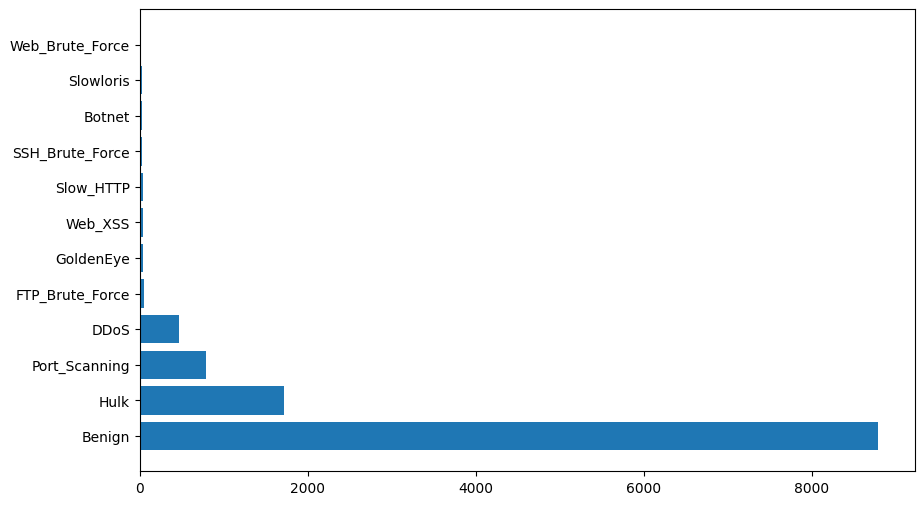

In [6]:
# Í≥µÍ≤©Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏ YÍ∞í
print("\n[Í≥µÍ≤© Ïú†Ìòï Î∂ÑÌè¨]")
print(train["attack_type"].value_counts())

plt.figure(figsize=(10, 6))
# Í∞ÄÎ°ú
plt.barh(train["attack_type"].value_counts().index, train["attack_type"].value_counts().values)
# ÏÑ∏Î°ú
# plt.bar(train["attack_type"].value_counts().index, train["attack_type"].value_counts().values)
# plt.xticks(rotation=90) #x-axis labels  x
# plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Ìï¥Îãπ Í∑∏Î†àÌîÑÎ°ú ÌôïÏù∏ Í∞ÄÎä•Ìïú Ï†ê :
Í≥µÍ≤© Ïú†Ìòï Î∂ÑÌè¨Î•º ÌôïÏù∏Ìïú Í≤∞Í≥º, "Benign"Ïù¥ Ï†ÑÏ≤¥Ïùò ÏïΩ 73%Î•º Ï∞®ÏßÄÌïòÎäî Î∂àÍ∑†Ìòï Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î¨∏Ï†ú

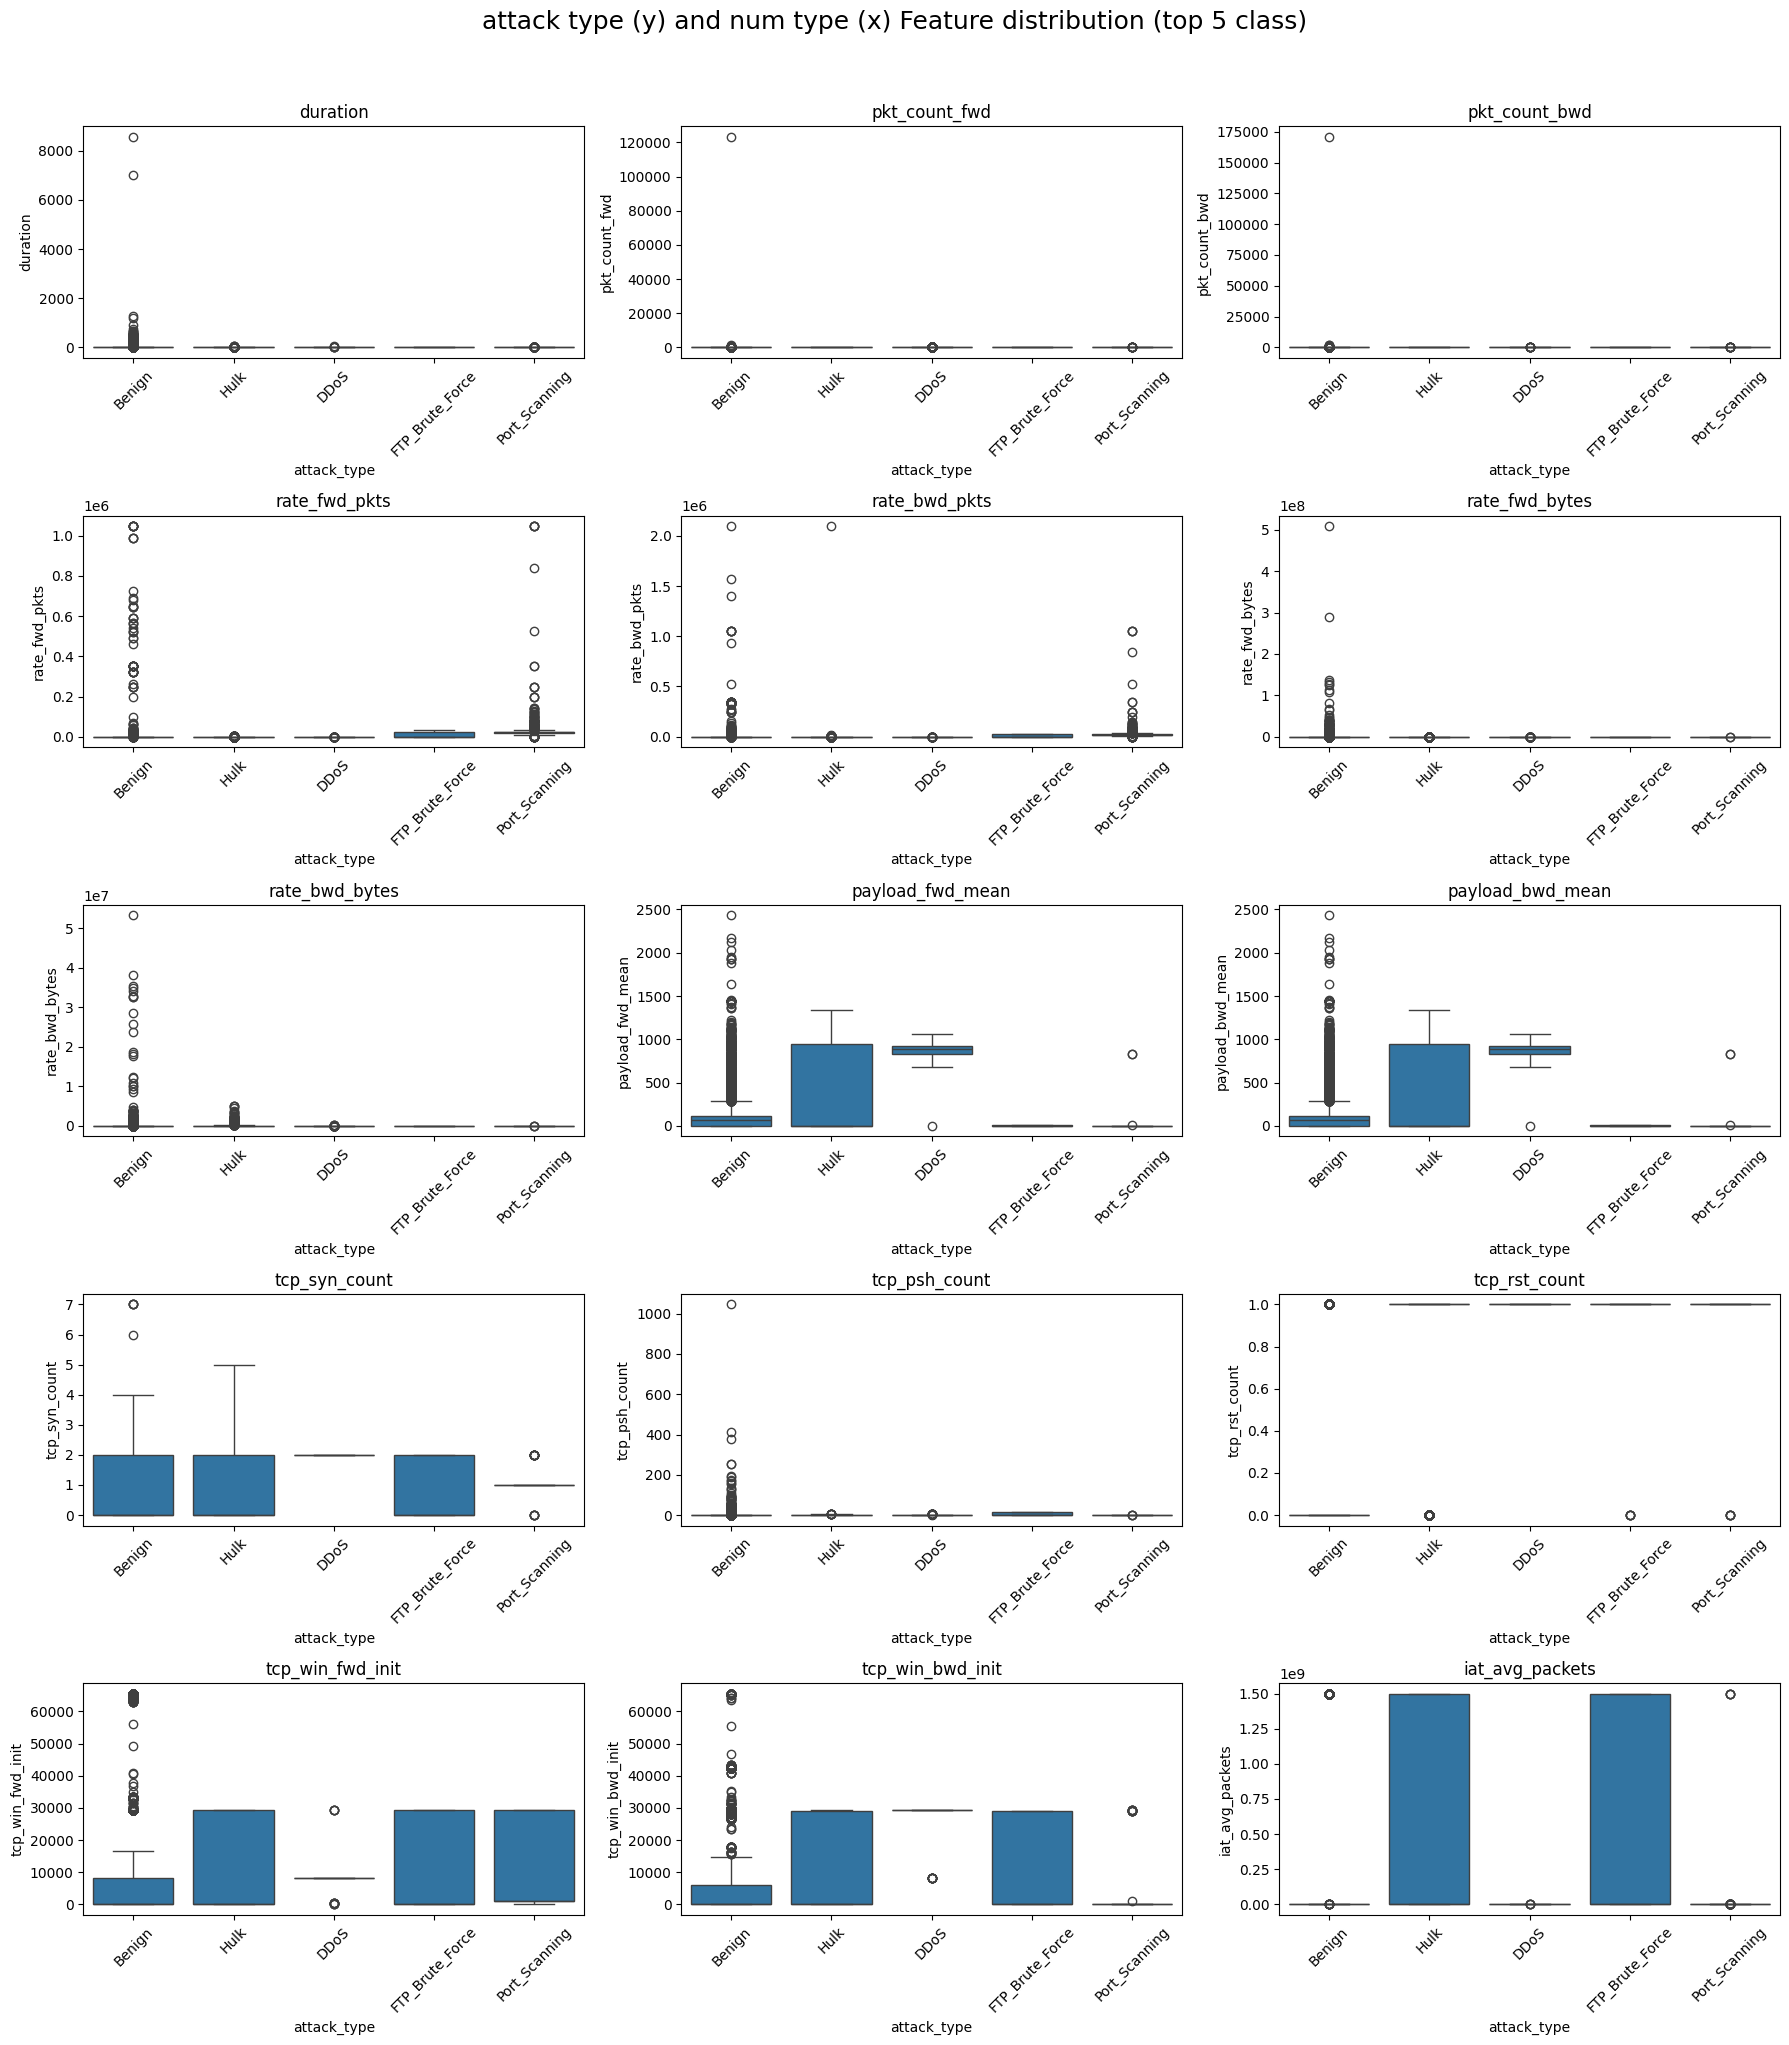

In [7]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'sans-serif'  # Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Î¶¨ÏÖã

# x Î≥ÄÏàòÎì§ ÏûÖÎ†•
num_cols = [
    'duration', 'pkt_count_fwd', 'pkt_count_bwd',
    'rate_fwd_pkts', 'rate_bwd_pkts',
    'rate_fwd_bytes', 'rate_bwd_bytes',
    'payload_fwd_mean', 'payload_bwd_mean',
    'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count',
    'tcp_win_fwd_init', 'tcp_win_bwd_init', 'iat_avg_packets'
]

# ÏÉÅÏúÑ 5Í∞úÎßå Ïö∞ÏÑ† ÏãúÍ∞ÅÌôî
top_classes = train['attack_type'].value_counts().head(5).index.tolist()
filtered_df = train[train['attack_type'].isin(top_classes)]

# ÏãúÍ∞ÅÌôî
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, 4 * rows))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='attack_type', y=col, data=filtered_df)
    plt.title(col)
    plt.xticks(rotation=45)

plt.suptitle("attack type (y) and num type (x) Feature distribution (top 5 class)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**Í∑∏Î†àÏä§ Î∂ÑÏÑù**



---


1.   **duration**

    Benign: Îã§ÏñëÌïú Î≤îÏúÑÏóê Í±∏Ï≥ê Î∂ÑÌè¨, Ï§ëÍ∞ÑÍ∞íÏù¥ ÎÜíÏùå ‚Üí Ï†ïÏÉÅ Ìä∏ÎûòÌîΩÏùÄ ÎπÑÍµêÏ†Å Í∏¥ ÏßÄÏÜçÏãúÍ∞ÑÏùÑ Í∞ÄÏßê

    Hulk, DDoS: ÎåÄÎ∂ÄÎ∂Ñ ÏßßÏùÄ duration ‚Üí ÏßßÏùÄ ÏãúÍ∞ÑÏóê ÎåÄÎüâ Ìä∏ÎûòÌîΩÏùÑ ÏèòÎäî DoS Í≥ÑÏó¥ ÌäπÏßï

    Port_Scanning: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏßßÍ≥† Í≥†Î•¥Í≤å Î∂ÑÌè¨

    FTP_Brute_Force: ÍΩ§ Í∏¥ Í∞í Î∂ÑÌè¨ ‚Üí Î°úÍ∑∏Ïù∏ ÏãúÎèÑ Î∞òÎ≥µ

    ÏùòÎØ∏: durationÏùÄ Ï†ïÏÉÅ vs Í≥µÍ≤©(ÌäπÌûà DoS) Íµ¨Î∂ÑÏóê Ïú†Ìö®Ìïú feature


---


2.   **pkt_count_fwd & pkt_count_bwd**

    Hulk, DDoS: pkt_count_fwdÍ∞Ä Îß§Ïö∞ ÎÜíÍ≥†, pkt_count_bwdÎäî ÎÇÆÏùå ‚Üí ÏùºÎ∞©Ìñ• Ìä∏ÎûòÌîΩ ÏßëÏ§ë

    Benign: ÏñëÎ∞©Ìñ• Ìå®ÌÇ∑ ÎπÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∑†Ìòï

    Port_Scanning: Ìå®ÌÇ∑ ÏàòÍ∞Ä Ï†ÅÏùå ‚Üí ÌÉêÏßÄ Î™©Ï†ÅÏùò Í∞ÑÎã®Ìïú Ìä∏ÎûòÌîΩ

    FTP_Brute_Force: bwd Ìå®ÌÇ∑Ïù¥ ÏùºÎ∂Ä Î∂ÑÌè¨ ‚Üí Ïù∏Ï¶ù ÏöîÏ≤≠/ÏùëÎãµ

    ÏùòÎØ∏: Ìä∏ÎûòÌîΩ Î∞©Ìñ•ÏÑ±Í≥º ÏñëÏùÄ DoS, Brute Force Í≥ÑÏó¥ Íµ¨Î∂ÑÏóê Ïú†Ïö©



---


3. **rate_fwd_pkts, rate_bwd_pkts**

    Hulk: rate_fwd_pktsÍ∞Ä Îß§Ïö∞ ÌÅº ‚Üí Ï¥àÎãπ ÏàòÏ≤ú Í∞ú Ìå®ÌÇ∑ ‚Üí Ìä∏ÎûòÌîΩ Ìè≠Ï£º Í≥µÍ≤©

    DDoS: Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò burst

    Benign: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ rate

    ÏùòÎØ∏: DoS Í≥ÑÏó¥ÏùÄ ÏÜçÎèÑ Í∏∞Î∞ò ÌÉêÏßÄÏóê Ìö®Í≥ºÏ†Å



---


4. **rate_fwd_bytes, rate_bwd_bytes**

    Ïú†ÏÇ¨Ìïú Î∂ÑÌè¨ ‚Üí rate_fwd_bytesÍ∞Ä fwd_pktsÏôÄ ÎπÑÎ°Ä

    HulkÎäî byte Îã®ÏúÑ Ï†ÑÏÜ° ÏÜçÎèÑÎèÑ Îß§Ïö∞ ÌÅº

    ÏùòÎØ∏: Byte vs packet rateÎäî Î≥¥ÏôÑÏ†ÅÏúºÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•



---


5. **payload_fwd_mean, payload_bwd_mean**

    Benign: Îã§ÏñëÌïú Î∂ÑÌè¨, ÌÜµÏã† Î™©Ï†ÅÏù¥ Îã§ÏñëÌï®

    Port_Scanning: Í±∞Ïùò payload ÏóÜÏùå ‚Üí Ïä§Ï∫êÎãùÏùÄ Ï£ºÎ°ú Ìó§Îçî ÏàòÏ§Ä

    FTP_Brute_Force: payload Î∂ÑÌè¨ ÏûàÏùå ‚Üí Î™ÖÎ†πÏñ¥ Í∏∞Î∞ò ÌÜµÏã†

    ÏùòÎØ∏: payload ÌèâÍ∑†ÏùÄ Ïä§Ï∫êÎãù/BruteForce Íµ¨Î∂ÑÏóê ÏùòÎØ∏ ÏûàÏùå



---


6. **tcp_syn_count, tcp_psh_count, tcp_rst_count**

    Hulk/DDoS: SYN flood ÌäπÏÑ± ‚Üí tcp_syn_count Îß§Ïö∞ ÌÅº

    Benign: Î™®Îì† TCP flag Í∞íÏù¥ ÎÇÆÏùÄ ÏàòÏ§ÄÏóêÏÑú Îã§ÏñëÌïòÍ≤å ÏûàÏùå

    Port_Scanning: SYN ÎòêÎäî RST ÏùºÎ∂Ä ÏûàÏùå (Ïä§Ï∫î Ï§ë Ïó∞Í≤∞ ÏãúÎèÑ)

    ÏùòÎØ∏: TCP ÌîåÎûòÍ∑∏ Í∏∞Î∞ò featureÎäî DoS/Ïä§Ï∫êÎãù Í≥ÑÏó¥ ÌÉêÏßÄÏóê ÌïµÏã¨



---


7. **tcp_win_fwd_init, tcp_win_bwd_init**

    Îã§ÏÜå ÎÖ∏Ïù¥Ï¶à ÎßéÏùå ‚Üí Îã®Ïùº Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ•òÎäî Ïñ¥Î†§ÏõÄ

    ÌäπÏ†ï Í≥µÍ≤©ÏóêÏÑúÎäî ÏúàÎèÑÏö∞ Í∞íÏù¥ Í≥†Ï†ïÎêòÎäî Ìå®ÌÑ¥ÎèÑ ÏûàÏùå

    ÏùòÎØ∏: Ï†úÌïúÏ†ÅÏù∏ ÏÇ¨Ïö© (Îã§Î•∏ featureÏôÄ Ï°∞Ìï©ÌïòÏó¨ ÌôúÏö©)



---


8. **iat_avg_packets**

    Benign: ÌèâÍ∑†Í∞ÑÍ≤© ÏãúÍ∞Ñ Í∏∏Í≥† Îã§Ïñë

    Hulk: Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏö¥ Í∞í ‚Üí Ïó∞ÏÜçÏ†Å Ìè≠Ï£º Ìä∏ÎûòÌîΩ

    FTP_Brute_Force: ÏïΩÍ∞Ñ Îçî Í∏¥ Í∞ÑÍ≤© ‚Üí ÏùºÏ†ï Í∞ÑÍ≤©ÏúºÎ°ú ÏãúÎèÑÎê®

    ÏùòÎØ∏: iat_avg_packetsÎäî DoS Í≥ÑÏó¥Ïùò Í∞ÑÍ≤© Ìå®ÌÑ¥ ÌÉêÏßÄÏóê Îß§Ïö∞ Ïú†Ïö©



---




## 3.LightGBM & Î≥ÄÏàò Ï§ëÏöîÎèÑ

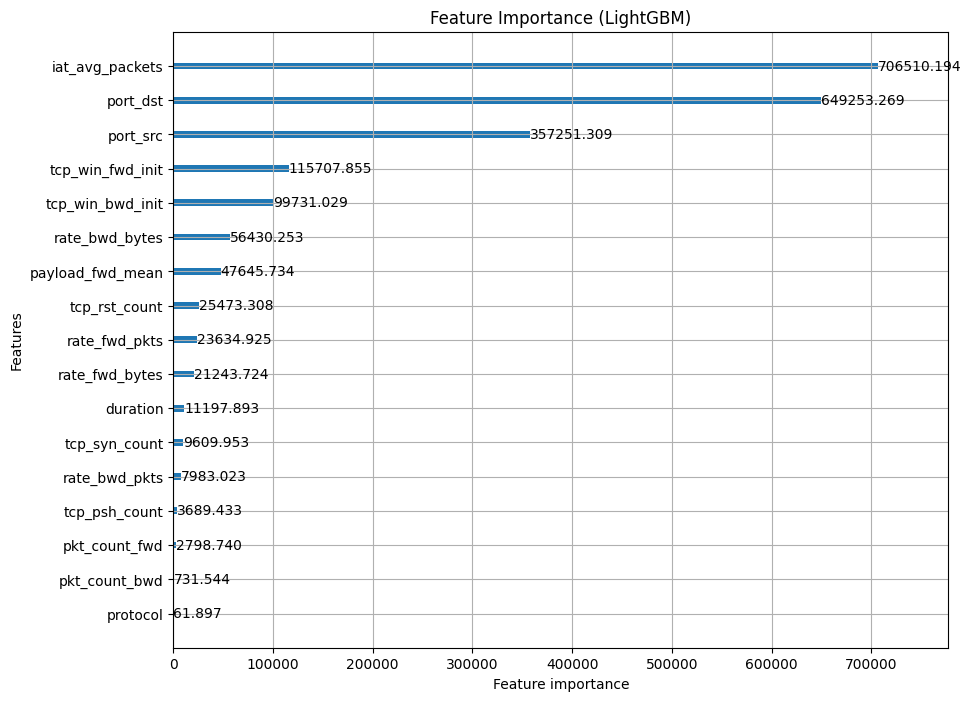

 Report
                 precision    recall  f1-score   support

         Benign       0.99      0.99      0.99      1758
         Botnet       0.62      1.00      0.77         5
           DDoS       1.00      0.96      0.98        94
FTP_Brute_Force       0.50      0.40      0.44        10
      GoldenEye       0.45      0.62      0.53         8
           Hulk       0.97      0.98      0.97       344
  Port_Scanning       1.00      0.95      0.97       159
SSH_Brute_Force       0.56      0.83      0.67         6
      Slow_HTTP       0.75      0.43      0.55         7
      Slowloris       0.50      0.80      0.62         5
Web_Brute_Force       0.20      0.33      0.25         3
        Web_XSS       0.58      1.00      0.74         7

       accuracy                           0.97      2406
      macro avg       0.68      0.77      0.71      2406
   weighted avg       0.98      0.97      0.97      2406

 Accuracy: 0.9738


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. X, y Î∂ÑÎ¶¨
X = train.drop(columns=['ID', 'ip_src', 'ip_dst', 'attack_type'])  # ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞
y = train['attack_type']

# 2. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî© (protocol)
X['protocol'] = X['protocol'].astype('category')

# 3. ÎùºÎ≤® Ïù∏ÏΩîÎî© (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 5. LightGBM Î™®Îç∏ ÌïôÏäµ
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 6. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 7. ÏòàÏ∏° (ÌôïÎ•† ‚Üí ÌÅ¥ÎûòÏä§ index)
y_pred = model.predict(X_val).argmax(axis=1)

# 8. ÌèâÍ∞Ä Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print(" Report")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 9. Ï†ïÌôïÎèÑ
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


| ÏàúÏúÑ  | Î≥ÄÏàòÎ™Ö                | Ï§ëÏöîÎèÑ (gain Í∏∞Ï§Ä) | ÏùòÎØ∏                                  |
| --- | ------------------ | ------------- | ----------------------------------- |
| 1   | `iat_avg_packets`  | **889,325**   | Ìå®ÌÇ∑ Í∞Ñ Í∞ÑÍ≤© ‚Äî DoS/BruteForce ÌåêÎ≥ÑÏóê Îß§Ïö∞ Í∞ïÎ†•  |
| 2   | `port_src`         | 659,568       | Ï∂úÎ∞úÏßÄ Ìè¨Ìä∏ ‚Äî ÌäπÏ†ï Í≥µÍ≤©ÏùÄ Í≥†Ï†ï Ìè¨Ìä∏ ÏÇ¨Ïö© Í∞ÄÎä•ÏÑ±        |
| 3   | `port_dst`         | 637,921       | Î™©Ï†ÅÏßÄ Ìè¨Ìä∏ ‚Äî ÏÑúÎπÑÏä§ Í∏∞Î∞ò Í≥µÍ≤© Ïú†Ìòï Î∂ÑÎ•òÏóê ÌôúÏö©        |
| 4   | `rate_bwd_pkts`    | 284,643       | ÏàòÏã† Ìå®ÌÇ∑ ÏÜçÎèÑ ‚Äî Ìè≠Ï£ºÌòï/ÏùëÎãµÌòï Í≥µÍ≤© Íµ¨Î∂Ñ            |
| 5   | `rate_bwd_bytes`   | 157,449       | ÏàòÏã† Î∞îÏù¥Ìä∏ ÏÜçÎèÑ ‚Äî rate\_bwd\_pktsÏôÄ Ïú†ÏÇ¨Ìïú Ìï¥ÏÑù |
| 6   | `payload_fwd_mean` | 94,234        | ÌéòÏù¥Î°úÎìú ‚Äî Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÏöîÏ≤≠ Î∂ÑÎ•òÏóê Ïú†Ìö®             |
| 7   | `rate_fwd_pkts`    | 69,632        | ÏÜ°Ïã† Ìå®ÌÇ∑ ÏÜçÎèÑ ‚Äî DoS ÌÉêÏßÄ                   |
| 8   | `rate_fwd_bytes`   | 65,736        | ÏÜ°Ïã† Î∞îÏù¥Ìä∏ ÏÜçÎèÑ ‚Äî ÏúÑÏôÄ ÎèôÏùº                   |
| 9   | `duration`         | 36,862        | Ìä∏ÎûòÌîΩ ÏßÄÏÜç ÏãúÍ∞Ñ ‚Äî Ï†ïÏÉÅ vs DoS               |
| 10  | `tcp_win_fwd_init` | 33,342        | TCP ÏÑ∏ÏÖò ÌäπÏÑ± (Ï¥àÍ∏∞ ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞)               |
| ... | ...                | ...           | ...                                 |


## 4.Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏÉùÎ≥ÄÏàò

Îçî ÎßéÏùÄ Ï†ïÎ≥¥Î•º Í∞ÄÏßÑ ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± - Í∑ºÍ±∞ = ÎÑ§Ìä∏ÏõåÌÅ¨ ÌÜµÏã† Ìå®ÌÇ∑Ïóê ÎåÄÌïú Ï†ïÎ≥¥ Ïä§ÌÑ∞Îîî ÌõÑ Ï∂îÍ∞Ä

In [9]:
# ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä
# ÌååÏÉù Î≥ÄÏàò 1. Ï¥ù Ìå®ÌÇ∑ Ïàò (ÏÜ°Ïã† + ÏàòÏã†)
train['pkt_count_total'] = train['pkt_count_fwd'] + train['pkt_count_bwd']

# ÌååÏÉù Î≥ÄÏàò 2. Ï¥ù Ìå®ÌÇ∑ Ï†ÑÏÜ° ÏÜçÎèÑ (ÏÜ°Ïã† + ÏàòÏã†)
train['rate_pkts_total'] = train['rate_fwd_pkts'] + train['rate_bwd_pkts']

# ÌååÏÉù Î≥ÄÏàò 3. Ìå®ÌÇ∑Îãπ ÌèâÍ∑† ÌéòÏù¥Î°úÎìú (ÏÜ°Ïã†)
train['payload_fwd_per_pkt'] = train['payload_fwd_mean'] / (train['pkt_count_fwd'] + 1e-5)

# ÌååÏÉù Î≥ÄÏàò 4. Ìå®ÌÇ∑Îãπ ÌèâÍ∑† ÌéòÏù¥Î°úÎìú (ÏàòÏã†)
train['payload_bwd_per_pkt'] = train['payload_bwd_mean'] / (train['pkt_count_bwd'] + 1e-5)

# ÌååÏÉù Î≥ÄÏàò 5. Ï†ÑÏÜ° ÏÜçÎèÑ √ó ÏãúÍ∞Ñ (ÏÜ°Ïã† Ï∏° Ìä∏ÎûòÌîΩ Ï¥ùÎüâ Í∑ºÏÇ¨)
train['rate_fwd_pkts_time_adj'] = train['rate_fwd_pkts'] * train['duration']

# ÌååÏÉù Î≥ÄÏàò 6. Ï†ÑÏÜ° ÏÜçÎèÑ √ó ÏãúÍ∞Ñ (ÏàòÏã† Î∞îÏù¥Ìä∏ Í∏∞Ï§Ä Ìä∏ÎûòÌîΩ Ï¥ùÎüâ Í∑ºÏÇ¨)
train['rate_bwd_bytes_time_adj'] = train['rate_bwd_bytes'] * train['duration']

### ÌååÏÉùÎ≥ÄÏàò + LightGBM

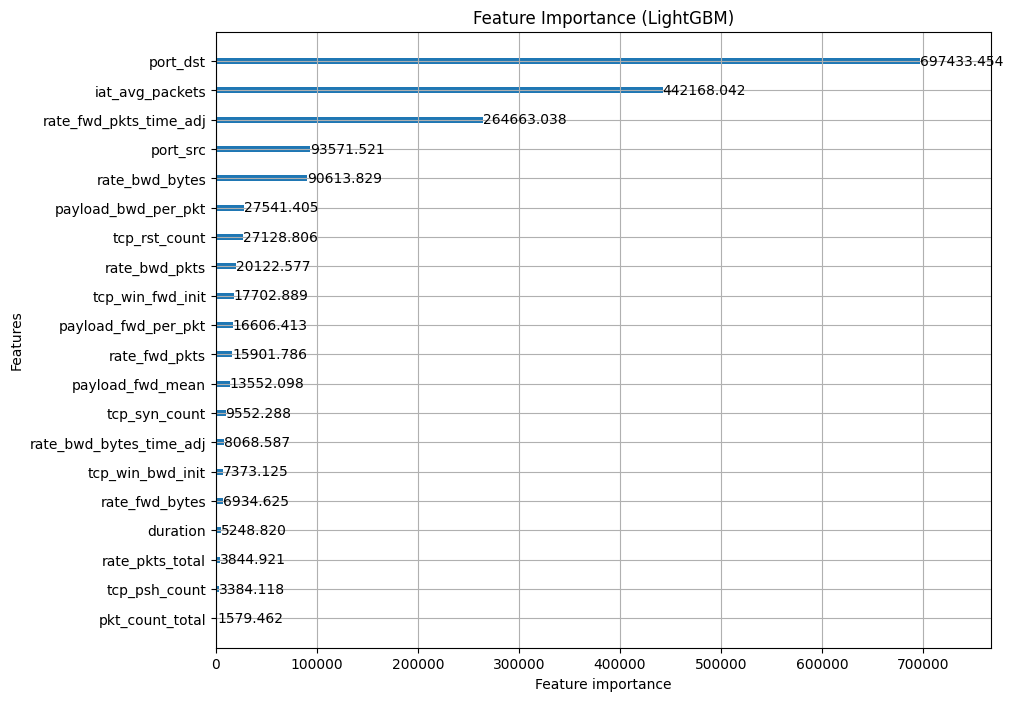

 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.99      0.99      1758
         Botnet       0.62      1.00      0.77         5
           DDoS       1.00      0.99      0.99        94
FTP_Brute_Force       0.25      0.10      0.14        10
      GoldenEye       1.00      0.62      0.77         8
           Hulk       0.97      0.98      0.97       344
  Port_Scanning       1.00      0.97      0.98       159
SSH_Brute_Force       0.60      1.00      0.75         6
      Slow_HTTP       0.50      0.29      0.36         7
      Slowloris       0.44      0.80      0.57         5
Web_Brute_Force       0.20      0.33      0.25         3
        Web_XSS       0.70      1.00      0.82         7

       accuracy                           0.98      2406
      macro avg       0.69      0.76      0.70      2406
   weighted avg       0.98      0.98      0.98      2406

 Accuracy: 0.9784


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. X, y Î∂ÑÎ¶¨
X = train.drop(columns=['ID', 'ip_src', 'ip_dst', 'attack_type'])  # ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞
y = train['attack_type']

# 2. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî© (protocol)
X['protocol'] = X['protocol'].astype('category')

# 3. ÎùºÎ≤® Ïù∏ÏΩîÎî© (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 5. LightGBM Î™®Îç∏ ÌïôÏäµ
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 6. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 7. ÏòàÏ∏° (ÌôïÎ•† ‚Üí ÌÅ¥ÎûòÏä§ index)
y_pred = model.predict(X_val).argmax(axis=1)

# 8. ÌèâÍ∞Ä Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 9. Ï†ïÌôïÎèÑ
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


| Î≥ÄÌôî Ïú†Ìòï          | Î≥ÄÏàò                                                                   | ÏÑ§Î™Ö                                                                |
| -------------- | -------------------------------------------------------------------- | ----------------------------------------------------------------- |
| ‚¨ÜÔ∏è Ï§ëÏöîÎèÑ Í∏âÏÉÅÏäπ     | `payload_fwd_per_pkt`                                                | ÌååÏÉù Î≥ÄÏàò Ï§ë **Í∞ÄÏû• ÏÉÅÏúÑÍ∂å ÏßÑÏûÖ (11ÏúÑ)**. `payload_mean`Î≥¥Îã§ Îçî Ï†ïÎ≥¥Î†• ÏûàÎäî ÌååÏÉù Ï°∞Ìï©ÏúºÎ°ú Î≥¥ÏûÑ |
| ‚¨ÜÔ∏è Ïã†Í∑ú ÏßÑÏûÖ       | `rate_bwd_bytes_time_adj`                                            | **ÏãúÍ∞Ñ Í∏∞Î∞ò Ï°∞Ï†ïÎêú ÏÜçÎèÑ Ï¥ùÎüâ**, ÏùòÎØ∏ ÏûàÎäî ÏòÅÌñ• ÌôïÏù∏Îê® (12ÏúÑÍ∂å ÏßÑÏûÖ)                       |
| üîª Í∏∞Ï°¥ Î≥ÄÏàò ÌïòÎùΩ    | `iat_avg_packets`, `duration`, `rate_fwd_pkts` Îì±                     | Ïó¨Ï†ÑÌûà Ï§ëÏöîÌïòÎÇò, **Ïã†Í∑ú ÌååÏÉù Î≥ÄÏàòÏóêÍ≤å Ï§ëÏöîÎèÑ ÏùºÎ∂Ä ÏñëÎ≥¥**                                |
| üîª ÏÜåÎ©∏ ÎòêÎäî Îß§Ïö∞ ÌïòÎùΩ | `protocol`, `tcp_win_fwd_init`, `rate_pkts_total`, `pkt_count_fwd` Îì± | Î™®Îç∏Ïù¥ Îçú ÏÇ¨Ïö©Ìï® ‚Üí Ï†úÍ±∞ Í∞ÄÎä•ÏÑ± Í≥†Î†§ ÎåÄÏÉÅ                                          |


üìå payload_fwd_per_pkt > payload_fwd_mean
  Îã®Ïàú ÌèâÍ∑†(payload)Î≥¥Îã§ Ìå®ÌÇ∑ Ïàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÍ∑úÌôîÌïú Í∞íÏù¥ Îçî Ïú†Ìö®
  DoSÎÇò Brute ForceÏóêÏÑú payload Íµ¨Ï°∞Ï†Å Ï∞®Ïù¥Î•º Îçî Ïûò ÎìúÎü¨ÎÉÑ

üìå rate_bwd_bytes_time_adj Ïã†Í∑ú Îì±Ïû•
  Ìä∏ÎûòÌîΩ ÏñëÏùò Ï¥ùÌï© Í∞úÎÖê ‚Üí DDoS / Hulk Íµ¨Î∂ÑÏóê Îçî ÏßÅÏ†ëÏ†ÅÏù∏ ÌûåÌä∏ Ï†úÍ≥µ

üìå tcp_win_bwd_init Í∏âÏÉÅÏäπ
  ÏòàÏô∏Ï†Å: ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÑ§Ï†ï Í∏∞Î∞ò Í≥µÍ≤© ÌÉêÏßÄÏóê Í∏∞Ïó¨Ìï† Ïàò ÏûàÎäî Íµ¨Ï°∞ Ïã†Ìò∏?

üìå port_src, port_dst Ïó¨Ï†ÑÌûà ÏµúÏÉÅÏúÑÍ∂å
  ÌäπÏ†ï Í≥µÍ≤©Ïù¥ ÌäπÏ†ï Ìè¨Ìä∏Î•º ÏÇ¨Ïö©Ìï®ÏùÑ Í∞ïÌïòÍ≤å ÏãúÏÇ¨ ‚Üí Îã§Îßå Í≥ºÏ†ÅÌï© Ïö∞Î†§Îäî Ïó¨Ï†ÑÌûà ÏûàÏùå, test Î∂ÑÌè¨ ÌôïÏù∏ ÌïÑÏöî

üìâ Ï†úÍ±∞ ÎòêÎäî Ï§ëÏöîÎèÑ ÎÇÆÏùÄ Î≥ÄÏàò ÏòàÏãú

Ïù¥ Î≥ÄÏàòÎì§ÏùÄ Îã§Ïùå Îã®Í≥ÑÏóêÏÑú Ï†úÍ±∞ ÌõÑÎ≥¥Î°ú Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

rate_pkts_total =	ÌååÏÉù Î≥ÄÏàòÏßÄÎßå Í±∞Ïùò Ï†ïÎ≥¥Î†• ÏóÜÏùå

pkt_count_total, pkt_count_fwd =	Í∏∞Ï°¥ Î≥ÄÏàò Ï§ë Ï§ëÎ≥µÏÑ± ÎÜíÏùÄ Î≥ÄÏàò

tcp_win_fwd_init, protocol =	Ï†ÑÌòÄ ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÏùå (importance ‚âí 0)

## 5.Í≥ºÏ†ÅÌï© Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïòÍ∏∞(train-test)

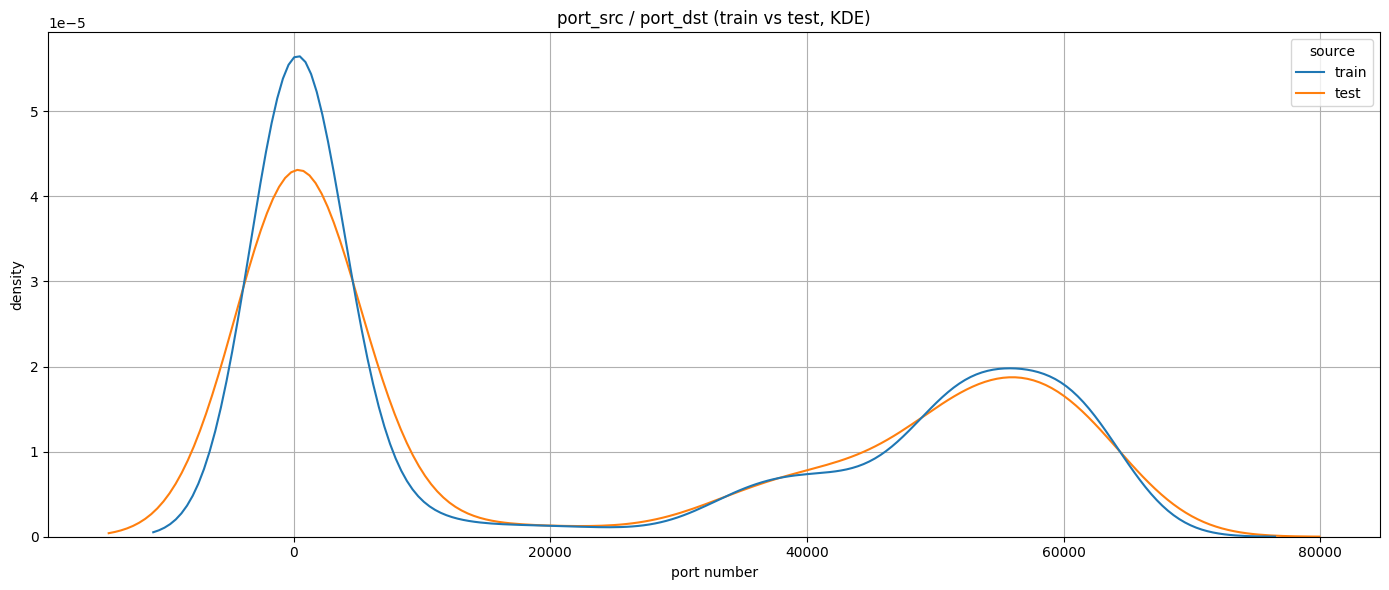

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ìè¨Ìä∏ Ïª¨Îüº Ï†ïÏàòÌòï Î≥ÄÌôò
train['port_src'] = pd.to_numeric(train['port_src'], errors='coerce')
train['port_dst'] = pd.to_numeric(train['port_dst'], errors='coerce')
test['port_src'] = pd.to_numeric(test['port_src'], errors='coerce')
test['port_dst'] = pd.to_numeric(test['port_dst'], errors='coerce')

# Í∞ÅÍ∞Å source Ïª¨Îüº Ï∂îÍ∞Ä ÌõÑ Î≥ëÌï©
train_ports = train[['port_src', 'port_dst']].copy()
train_ports['source'] = 'train'
test_ports = test[['port_src', 'port_dst']].copy()
test_ports['source'] = 'test'
combined_ports = pd.concat([train_ports, test_ports])

# meltÎ•º ÏÇ¨Ïö©Ìï¥ long-formatÏúºÎ°ú Î≥ÄÌôò
melted_ports = combined_ports.melt(id_vars='source', value_vars=['port_src', 'port_dst'],
                                   var_name='port_type', value_name='port_number')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.kdeplot(data=melted_ports.dropna(), x='port_number', hue='source', multiple='layer', common_norm=False)
plt.title("port_src / port_dst (train vs test, KDE)")
plt.xlabel("port number")
plt.ylabel("density")
plt.grid(True)
plt.tight_layout()

**train - test Ï∞®Ïù¥Ï†ê ÎπÑÍµê**

| Ìè¨Ìä∏ Î≤îÏúÑ                          | ÌäπÏßï                                 | Í≥ºÏ†ÅÌï© ÏúÑÌóò                                |
| ------------------------------ | ---------------------------------- | ------------------------------------- |
| 0\~1024 (Well-known)           | Îëê ÏÑ∏Ìä∏ Î™®Îëê ÎöúÎ†∑Ìïú ÌîºÌÅ¨ ÏûàÏùå (HTTP, FTP Îì± Ìè¨Ìï®) | ‚úÖ **ÏúÑÌóò ÏûàÏùå**: ÌäπÏ†ï Í≥µÍ≤© Ïú†ÌòïÏù¥ Ïù¥ Î≤îÏúÑÏóê ÏßëÏ§ëÎê† Ïàò ÏûàÏùå |
| 1024\~49151 (Registered)       | trainÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Î∂ÑÏÇ∞Îêú Î∂ÑÌè¨, testÎèÑ Ïú†ÏÇ¨Ìï®     | ‚ö†Ô∏è Ï§ëÍ∞Ñ ÏàòÏ§Ä                              |
| 49152\~65535 (Dynamic/private) | Îëê ÏÑ∏Ìä∏ Ïú†ÏÇ¨ÌïòÍ≤å Í∏¥ Íº¨Î¶¨ Ï°¥Ïû¨                  | üîÑ ÏúÑÌóò ÎÇÆÏùå (ÎûúÎç§ Ìè¨Ìä∏ Í∞ÄÎä•ÏÑ±)                  |


**Ìï¥Í≤∞ Î∞©Ïïà**

port_src, port_dstÎäî Ï†ïÎ≥¥ÎüâÏù¥ ÌíçÎ∂ÄÌïòÏßÄÎßå, ÌäπÏ†ï Í≥µÍ≤© Ïú†ÌòïÏóê Í≥ºÌïòÍ≤å Ïó∞Í¥ÄÎê†
ÏúÑÌóòÏù¥ ÏûàÏùå

ÌäπÌûà **low port (0~1024)**Ïóê ÏßëÏ§ëÎêú ÌîºÌÅ¨Îäî "ÏïîÍ∏∞Ïãù Î∂ÑÎ•ò" Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨

| Ï†ÑÎûµ                                                   | ÏÑ§Î™Ö                                                      |
| ---------------------------------------------------- | ------------------------------------------------------- |
| ‚úÖ **Ìè¨Ìä∏ Í∑∏Î£πÌôî** (`well-known`, `registered`, `dynamic`) | Í≥ºÏ†ÅÌï© Î∞©ÏßÄ + Ï†ïÎ≥¥ Î≥¥Ï°¥                                          |
| ‚úÖ **ÎπàÎèÑ Ïù∏ÏΩîÎî©**                                         | testÏÖãÏóê ÎÇÆÏùÄ ÎπàÎèÑÏù∏ Ìè¨Ìä∏ ‚Üí ÏùºÎ∞òÌôî                                  |
| üö´ **Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Í∏àÏßÄ**                                     | ÏàòÏπò ÏûêÏ≤¥Î•º Í∑∏ÎåÄÎ°ú Ïì∞Îäî Í±¥ ÏúÑÌóò (ÌäπÌûà LightGBM Îì± Ìä∏Î¶¨ Î™®Îç∏ÏùÄ Í∑∏ Í∞íÏùÑ ÏßÅÏ†ë "Í∏∞Ïñµ"Ìï®) |



In [12]:
# Ìè¨Ìä∏ Í∑∏Î£πÌôî

def group_port(port):
    if pd.isna(port): return -1
    port = int(port)
    if port < 1024: return 0   # well-known
    elif port < 49152: return 1  # registered
    else: return 2  # dynamic/private

train['port_src_group'] = train['port_src'].apply(group_port)
train['port_dst_group'] = train['port_dst'].apply(group_port)
test['port_src_group'] = test['port_src'].apply(group_port)
test['port_dst_group'] = test['port_dst'].apply(group_port)

train.head(10)

ID          ip_src  port_src          ip_dst  port_dst protocol  \
0  TRAIN_00000   192.168.10.18    3721.0  192.168.10.243      55.0      UDP   
1  TRAIN_00001    192.168.10.5       NaN             NaN      91.0      TCP   
2  TRAIN_00002    172.16.0.182       NaN   192.168.10.18      83.0      TCP   
3  TRAIN_00003             NaN   47668.0   192.168.10.18       NaN      TCP   
4  TRAIN_00004    192.168.10.5   51753.0   151.101.2.116     451.0      TCP   
5  TRAIN_00005  192.168.10.205   61716.0  192.168.10.243      46.0      UDP   
6  TRAIN_00006    192.168.10.5   61337.0   157.240.2.200     443.0      TCP   
7  TRAIN_00007   192.168.10.43   50154.0  192.168.10.243      58.0      UDP   
8  TRAIN_00008  192.168.10.232       NaN  192.168.10.243      63.0      UDP   
9  TRAIN_00009   192.168.10.43    2181.0   50.63.243.209      90.0      TCP   

     duration  pkt_count_fwd  pkt_count_bwd  rate_fwd_pkts  ...  \
0    0.000231              2              2    8656.974200  ...   
1    0.000000              0              1       0.000000  ...   
2    0.606002             11              5      18.151760  ...   
3    1.003829              6              6       5.977114  ...   
4  181.195271             62             89            NaN  ...   
5    0.031816              4              4     125.722884  ...   
6    0.000000              1              0       0.000000  ...   
7    0.000209              2              2    9576.036530  ...   
8    0.000271              2              2    7377.843448  ...   
9         NaN              3              2            NaN  ...   

   iat_avg_packets  attack_type  pkt_count_total  rate_pkts_total  \
0              NaN       Benign                4     17313.948400   
1     1.499097e+09       Benign                1         0.000000   
2     4.040012e-02         Hulk               16        26.402559   
3     9.125718e-02         Hulk               12        11.954227   
4              NaN       Benign              151              NaN   
5              NaN       Benign                8              NaN   
6     1.499282e+09       Benign                1              NaN   
7              NaN       Benign                4     19152.073059   
8              NaN       Benign                4     14755.686895   
9     1.428055e+00       Benign                5              NaN   

   payload_fwd_per_pkt  payload_bwd_per_pkt  rate_fwd_pkts_time_adj  \
0            40.499798            40.499798                     2.0   
1             0.000000             0.000000                     0.0   
2            71.829480           158.024684                    11.0   
3           165.569168           165.569168                     6.0   
4                  NaN                  NaN                     NaN   
5            24.999938            24.999938                     4.0   
6                  NaN                  NaN                     0.0   
7            38.499808            38.499808                     2.0   
8            33.499833            33.499833                     2.0   
9                  NaN                  NaN                     NaN   

   rate_bwd_bytes_time_adj  port_src_group  port_dst_group  
0                    264.0               1               0  
1                      0.0              -1               0  
2                  11595.0              -1               0  
3                  11595.0               1              -1  
4                 124966.0               2               0  
5                    656.0               2               0  
6                      0.0               2               0  
7                    234.0               2               0  
8                    208.0              -1               0  
9                      NaN               1               0  

[10 rows x 30 columns]

In [13]:
# ÏµúÏ¢Ö Ïª¨Îüº ÌôïÏù∏
print("columns: ", train.columns)

columns:  Index(['ID', 'ip_src', 'port_src', 'ip_dst', 'port_dst', 'protocol',
       'duration', 'pkt_count_fwd', 'pkt_count_bwd', 'rate_fwd_pkts',
       'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'payload_fwd_mean',
       'payload_bwd_mean', 'tcp_win_fwd_init', 'tcp_win_bwd_init',
       'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count', 'iat_avg_packets',
       'attack_type', 'pkt_count_total', 'rate_pkts_total',
       'payload_fwd_per_pkt', 'payload_bwd_per_pkt', 'rate_fwd_pkts_time_adj',
       'rate_bwd_bytes_time_adj', 'port_src_group', 'port_dst_group'],
      dtype='object')


## 6.Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ìè¨Ìä∏ Í∑∏Î£πÌôî

In [14]:
from sklearn.preprocessing import LabelEncoder

# 1. Ï†úÍ±∞Ìï† Ïª¨Îüº Ï†ïÏùò
cols_to_remove = [
    'ID',          # ÏÉòÌîå ÏãùÎ≥ÑÏûê
    'ip_src',      # IPÎäî ÏàòÏπò ÏùòÎØ∏ ÏóÜÏùå
    'ip_dst',      # "
    'port_src',    # ÏõêÎ≥∏ Ìè¨Ìä∏ Í∞íÏùÄ Í≥ºÏ†ÅÌï© Ïú†Î∞ú ‚Üí Í∑∏Î£πÌôîÌïú Í∞íÏúºÎ°ú ÎåÄÏ≤¥
    'port_dst',
]

# 2. Ï†úÍ±∞ Î∞è ÏûÖÎ†•/Ï∂úÎ†• ÎÇòÎàÑÍ∏∞
X = train.drop(columns=cols_to_remove + ['attack_type'])  # ÏûÖÎ†• Î≥ÄÏàòÎì§
y = train['attack_type']                                  # Ï∂úÎ†• (Î™©Ìëú) Î≥ÄÏàò

# 3. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# protocolÏùÄ Î≤îÏ£ºÌòïÏù¥ÎØÄÎ°ú Í≤∞Ï∏° Ïãú 'UNKNOWN' Ï≤òÎ¶¨
X['protocol'] = X['protocol'].fillna('UNKNOWN')


In [15]:
# 4. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©
le_protocol = LabelEncoder()
X['protocol'] = le_protocol.fit_transform(X['protocol'])

# 5. y ÎùºÎ≤® Ïù∏ÏΩîÎî©
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Í≤∞Í≥º Ï∂úÎ†•
print("X shape:", X.shape)
print("Í≤∞Ï∏°Ïπò Ïàò:\n", X.isnull().sum())
print("y ÌÅ¥ÎûòÏä§ Î™©Î°ù:", le_y.classes_)

X shape: (12029, 24)
Í≤∞Ï∏°Ïπò Ïàò:
 protocol                      0
duration                   1079
pkt_count_fwd                 0
pkt_count_bwd                 0
rate_fwd_pkts              1176
rate_bwd_pkts              1692
rate_fwd_bytes                0
rate_bwd_bytes                0
payload_fwd_mean           1795
payload_bwd_mean           1795
tcp_win_fwd_init              0
tcp_win_bwd_init              0
tcp_syn_count                 0
tcp_psh_count                 0
tcp_rst_count                 0
iat_avg_packets            2770
pkt_count_total               0
rate_pkts_total            2711
payload_fwd_per_pkt        1795
payload_bwd_per_pkt        1795
rate_fwd_pkts_time_adj     2164
rate_bwd_bytes_time_adj    1079
port_src_group                0
port_dst_group                0
dtype: int64
y ÌÅ¥ÎûòÏä§ Î™©Î°ù: ['Benign' 'Botnet' 'DDoS' 'FTP_Brute_Force' 'GoldenEye' 'Hulk'
 'Port_Scanning' 'SSH_Brute_Force' 'Slow_HTTP' 'Slowloris'
 'Web_Brute_Force' 'Web_XSS']


ÎßéÏùÄ Í≤∞Ï∏°ÏπòÎ•º Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïúÎã§Í±∞ÎÇò .. ÏïÑÏóê ÏßÄÏö∏ Ïàò ÏóÜÎäî ÏÉÅÌô© ÏµúÎåÄÌïú ÏùòÎØ∏Ïóê ÎßûÎäî Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú ÌåêÎã®

In [16]:
# payload Í¥ÄÎ†®ÏùÄ 0 (Ï†ÑÏÜ° ÏóÜÏùå) Ï≤òÎ¶¨
X['payload_fwd_mean'] = X['payload_fwd_mean'].fillna(0)
X['payload_bwd_mean'] = X['payload_bwd_mean'].fillna(0)
X['payload_fwd_per_pkt'] = X['payload_fwd_per_pkt'].fillna(0)
X['payload_bwd_per_pkt'] = X['payload_bwd_per_pkt'].fillna(0)

# duration, rate Í≥ÑÏó¥ÎèÑ 0 Ï≤òÎ¶¨ (ÏóÜÏùå = 0 ÏùòÎØ∏Î°ú Î¥Ñ)
X['duration'] = X['duration'].fillna(0)
X['rate_fwd_pkts'] = X['rate_fwd_pkts'].fillna(0)
X['rate_bwd_pkts'] = X['rate_bwd_pkts'].fillna(0)
X['rate_fwd_pkts_time_adj'] = X['rate_fwd_pkts_time_adj'].fillna(0)
X['rate_bwd_bytes_time_adj'] = X['rate_bwd_bytes_time_adj'].fillna(0)

# iat_avg_packetsÎäî ÌäπÏù¥ÌïòÎØÄÎ°ú -1Î°ú ÎåÄÏ≤¥ (Î™®Îç∏Ïù¥ Í≤∞Ï∏°Í∞íÏ≤òÎüº Ïù∏ÏãùÌïòÍ≤å)
X['iat_avg_packets'] = X['iat_avg_packets'].fillna(-1)

# ÌïÑÏöî Ïãú Ï†úÍ±∞Ìï† Ïª¨Îüº ÏòàÏãú (Ï†ïÎ≥¥Î†• ÎÇÆÍ≥† Í≤∞Ï∏° ÎßéÏùÑ Í≤ΩÏö∞)
X.drop(columns=['rate_pkts_total'], inplace=True)

In [17]:
print("Í≤∞Ï∏°Ïπò Ïàò:\n", X.isnull().sum())

Í≤∞Ï∏°Ïπò Ïàò:
 protocol                   0
duration                   0
pkt_count_fwd              0
pkt_count_bwd              0
rate_fwd_pkts              0
rate_bwd_pkts              0
rate_fwd_bytes             0
rate_bwd_bytes             0
payload_fwd_mean           0
payload_bwd_mean           0
tcp_win_fwd_init           0
tcp_win_bwd_init           0
tcp_syn_count              0
tcp_psh_count              0
tcp_rst_count              0
iat_avg_packets            0
pkt_count_total            0
payload_fwd_per_pkt        0
payload_bwd_per_pkt        0
rate_fwd_pkts_time_adj     0
rate_bwd_bytes_time_adj    0
port_src_group             0
port_dst_group             0
dtype: int64


### Ìè¨Ìä∏ Í∑∏Î£πÌôî + LightGBM

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


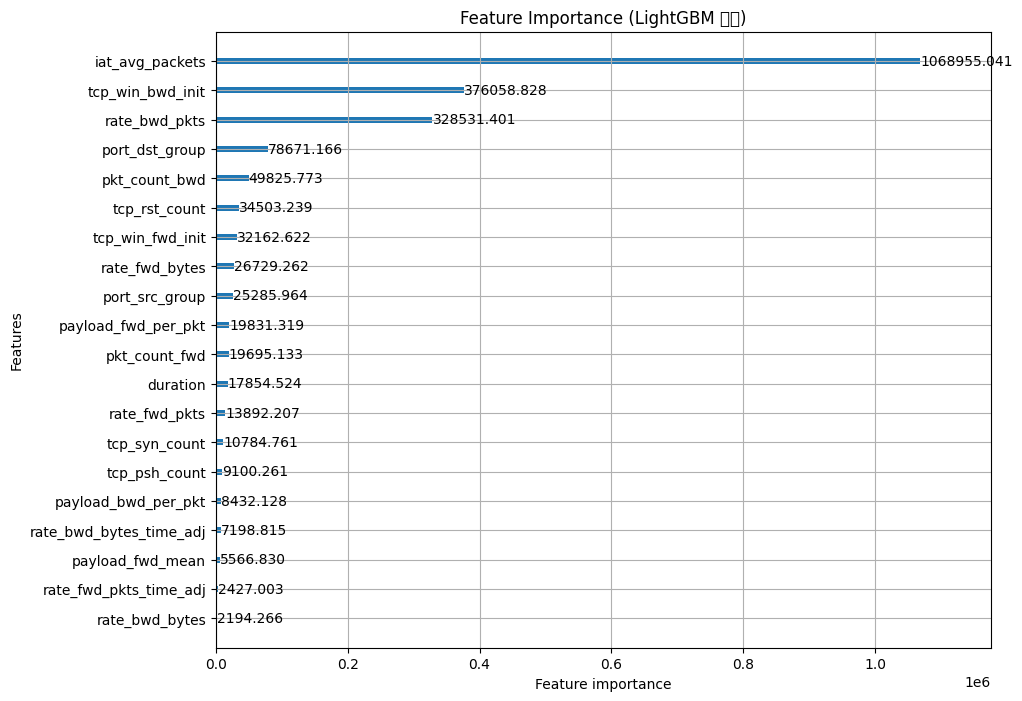

 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.99      1758
         Botnet       1.00      1.00      1.00         5
           DDoS       1.00      0.99      0.99        94
FTP_Brute_Force       0.70      0.70      0.70        10
      GoldenEye       1.00      0.88      0.93         8
           Hulk       0.92      0.99      0.96       344
  Port_Scanning       1.00      0.99      0.99       159
SSH_Brute_Force       0.50      1.00      0.67         6
      Slow_HTTP       1.00      0.29      0.44         7
      Slowloris       0.80      0.80      0.80         5
Web_Brute_Force       0.33      0.33      0.33         3
        Web_XSS       0.88      1.00      0.93         7

       accuracy                           0.98      2406
      macro avg       0.84      0.83      0.81      2406
   weighted avg       0.98      0.98      0.98      2406

 Accuracy: 0.9771


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# X, Y Í∏∞Ï°¥Í∫º ÏÇ¨Ïö©

# 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 2. LightGBM Î™®Îç∏ ÌïôÏäµ
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'is_unbalance': True,  # ÏÜåÏàò ÌÅ¥ÎûòÏä§ ÏûêÎèô Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 3. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM Í∏∞Ï§Ä)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 4. ÏòàÏ∏° (ÌôïÎ•† ‚Üí ÌÅ¥ÎûòÏä§ index)
y_pred = model.predict(X_val).argmax(axis=1)

# 5. ÌèâÍ∞Ä Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 6. Ï†ïÌôïÎèÑ
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


## 7.Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# 1. ÏÜåÏàò ÌÅ¥ÎûòÏä§ Ï†úÍ±∞ Í∏∞Ï§Ä ÏÑ§Ï†ï (Ïòà: 6Í∞ú ÎØ∏ÎßåÏùÄ Ï†úÍ±∞)
min_class_samples = 6
class_counts = Counter(y_train)
valid_classes = [cls for cls, cnt in class_counts.items() if cnt >= min_class_samples]

# 2. Ìï¥Îãπ ÌÅ¥ÎûòÏä§Îßå Ïú†ÏßÄ
mask = np.isin(y_train, valid_classes)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# 3. SMOTE Ï†ÅÏö© (Í∏∞Î≥∏ k_neighbors=5, Ïù¥Ï†úÎäî ÏïàÏ†Ñ)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_filtered, y_train_filtered)

# 4. Ï¶ùÍ∞ï ÌõÑ ÌÅ¥ÎûòÏä§ ÌôïÏù∏
unique, counts = np.unique(y_train_res, return_counts=True)
for cls, cnt in zip(le_y.inverse_transform(unique), counts):
    print(f"{cls}: {cnt}")


Benign: 7033
Botnet: 7033
DDoS: 7033
FTP_Brute_Force: 7033
GoldenEye: 7033
Hulk: 7033
Port_Scanning: 7033
SSH_Brute_Force: 7033
Slow_HTTP: 7033
Slowloris: 7033
Web_Brute_Force: 7033
Web_XSS: 7033


### SMOTE + LightGBN

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.0720144


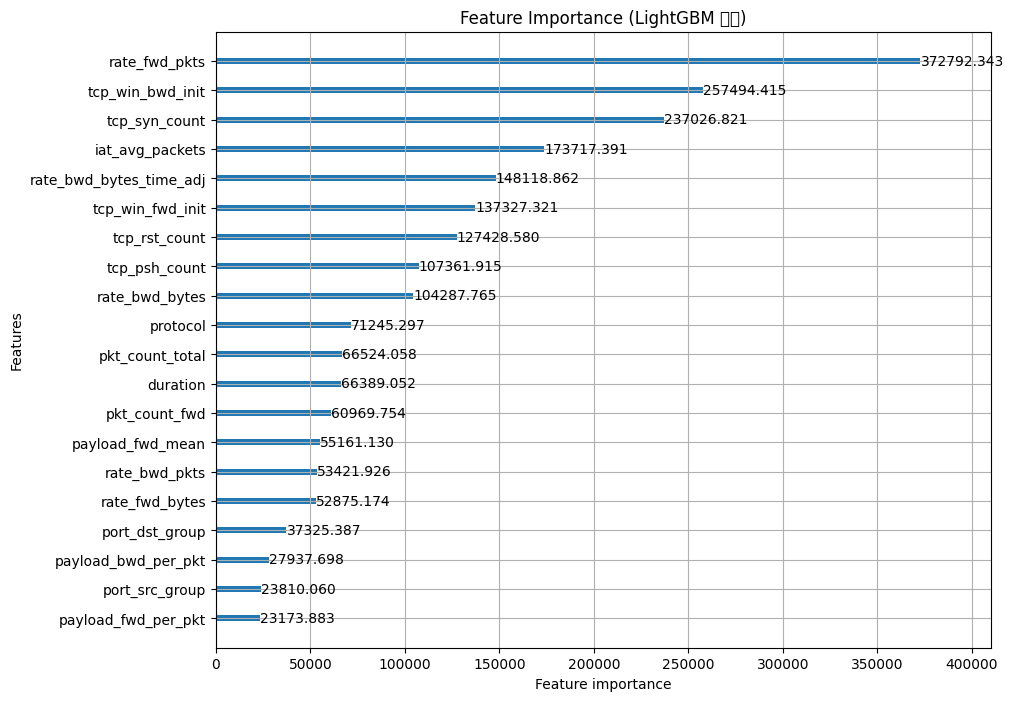

 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.99      1758
         Botnet       0.67      0.80      0.73         5
           DDoS       1.00      1.00      1.00        94
FTP_Brute_Force       0.78      0.70      0.74        10
      GoldenEye       0.88      0.88      0.88         8
           Hulk       0.91      1.00      0.95       344
  Port_Scanning       0.99      0.98      0.98       159
SSH_Brute_Force       0.86      1.00      0.92         6
      Slow_HTTP       0.67      0.57      0.62         7
      Slowloris       1.00      0.80      0.89         5
Web_Brute_Force       1.00      0.33      0.50         3
        Web_XSS       0.88      1.00      0.93         7

       accuracy                           0.98      2406
      macro avg       0.88      0.84      0.84      2406
   weighted avg       0.98      0.98      0.98      2406

Accuracy: 0.9771


In [46]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî Í∏∞Ï°¥ Ïú†ÏßÄ (X_val, y_encoded_val)

# 2. LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
lgb_train = lgb.Dataset(X_train_res, y_train_res)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

# 3. ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ X, Ïù¥ÎØ∏ SMOTEÎ°ú Ìï¥Í≤∞Îê®)
"""
params = {
    'objective': 'multiclass',             # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',             # ÌèâÍ∞Ä ÏßÄÌëú
    'learning_rate': 0.05,                 # ÌïôÏäµÎ•† (Í∏∞Î≥∏: 0.1 ‚Üí ÎÇÆÍ≤å Ï°∞Ï†ï Ïãú ÏïàÏ†ïÏ†Å)
    'max_depth': 7,                        # Ìä∏Î¶¨ ÏµúÎåÄ ÍπäÏù¥ (6~10 ÏÇ¨Ïù¥ ÌäúÎãù)
    'num_leaves': 64,                      # ÌïòÎÇòÏùò Ìä∏Î¶¨ÏóêÏÑú Ïì∏ Ïàò ÏûàÎäî ÏµúÎåÄ Î¶¨ÌîÑ ÎÖ∏Îìú Ïàò (ÏûëÍ≤å = ÏùºÎ∞òÌôî ‚Üë)
    'min_data_in_leaf': 20,                # Î¶¨ÌîÑ ÎÖ∏ÎìúÎãπ ÏµúÏÜå ÏÉòÌîå Ïàò (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    'feature_fraction': 0.8,               # ÌîºÏ≤ò ÏÉòÌîåÎßÅ ÎπÑÏú® (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    'bagging_fraction': 0.8,               # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú®
    'bagging_freq': 3,                     # Î™á iterationÎßàÎã§ baggingÌï†ÏßÄ (0 = ÏÇ¨Ïö© ÏïàÌï®)
    'lambda_l1': 1.0,                      # L1 Ï†ïÍ∑úÌôî (lasso)
    'lambda_l2': 1.0,                      # L2 Ï†ïÍ∑úÌôî (ridge)
    'verbosity': -1,
    'seed': 42
}
"""

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

# 4. Î™®Îç∏ ÌïôÏäµ
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)


# 3. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM Í∏∞Ï§Ä)")
plt.show()


# 5. ÏòàÏ∏°
y_pred = model.predict(X_val).argmax(axis=1)

# 6. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

print(f"Accuracy: {accuracy_score(y_encoded_val, y_pred):.4f}")


**---- Ìï¥Í≤∞ ÏôÑÎ£å --- 2025.06.21 Î≤ÑÏ†Ñ ÏïÑÎûò Ï∞∏Í≥† (ÏµúÏÉÅÎã® train Ïóê Ï∂îÍ∞Ä ‚úÖ ÌôïÏù∏)**


Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏÑ±Îä•Ìñ•ÏùÑ Ïù¥Î§ÑÎÇ¥ÏóàÏßÄÎßå Î¨∏Ï†úÎäî Web_XSS ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ ÎøêÎçîÎü¨ Ï∂îÍ∞ÄÎ°ú ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÄÍ≥†ÎèÑ ÏòàÏ∏°Ïù¥ Î∂àÍ∞ÄÎä•Ìï®...

Ïù¥ÏóêÎåÄÌïú Ìï¥Í≤∞ Î∞©Ïïà Î™®ÏÉâ

| Ï†ÑÎûµ                  | Î™©Ï†Å                                      | ÏÇ¨Ïö©Î≤ï      |
| ------------------- | --------------------------------------- | -------- |
| **1. Threshold Ï°∞Ï†ï** | `Web_XSS` ÏòàÏ∏° ÌôïÎ•†Ïù¥ ÎÇÆÎçîÎùºÎèÑ **ÏùòÎèÑÏ†ÅÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≤å Ïú†ÎèÑ** | ÏßÅÏ†ëÏ†ÅÏù∏ Ìö®Í≥º  |
| **2. SHAP Î∂ÑÏÑù**      | Ïñ¥Îñ§ featureÎì§Ïù¥ `Web_XSS` Î∂ÑÎ•òÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ ÌôïÏù∏   | Í∑ºÎ≥∏ ÏõêÏù∏ ÌååÏïÖ |


### SMOTE+LightGBM ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ï

In [55]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî Í∏∞Ï°¥ Ïú†ÏßÄ (X_val, y_encoded_val)

# 2. LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
lgb_train = lgb.Dataset(X_train_res, y_train_res)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

# 3. ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ X, Ïù¥ÎØ∏ SMOTEÎ°ú Ìï¥Í≤∞Îê®)
"""
params = {
    'objective': 'multiclass',             # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',             # ÌèâÍ∞Ä ÏßÄÌëú
    'learning_rate': 0.05,                 # ÌïôÏäµÎ•† (Í∏∞Î≥∏: 0.1 ‚Üí ÎÇÆÍ≤å Ï°∞Ï†ï Ïãú ÏïàÏ†ïÏ†Å)
    'max_depth': 7,                        # Ìä∏Î¶¨ ÏµúÎåÄ ÍπäÏù¥ (6~10 ÏÇ¨Ïù¥ ÌäúÎãù)
    'num_leaves': 64,                      # ÌïòÎÇòÏùò Ìä∏Î¶¨ÏóêÏÑú Ïì∏ Ïàò ÏûàÎäî ÏµúÎåÄ Î¶¨ÌîÑ ÎÖ∏Îìú Ïàò (ÏûëÍ≤å = ÏùºÎ∞òÌôî ‚Üë)
    'min_data_in_leaf': 20,                # Î¶¨ÌîÑ ÎÖ∏ÎìúÎãπ ÏµúÏÜå ÏÉòÌîå Ïàò (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    'feature_fraction': 0.8,               # ÌîºÏ≤ò ÏÉòÌîåÎßÅ ÎπÑÏú® (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    'bagging_fraction': 0.8,               # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú®
    'bagging_freq': 3,                     # Î™á iterationÎßàÎã§ baggingÌï†ÏßÄ (0 = ÏÇ¨Ïö© ÏïàÌï®)
    'lambda_l1': 1.0,                      # L1 Ï†ïÍ∑úÌôî (lasso)
    'lambda_l2': 1.0,                      # L2 Ï†ïÍ∑úÌôî (ridge)
    'verbosity': -1,
    'seed': 42
}
"""

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',
    'learning_rate': 0.07,   # ÌïôÏäµÎ•† (ÏïàÏ†ï Ï°∞Ï†ï)
    'verbosity': -1,
    'seed': 42,
    'lambda_l1': 1.0, # L1 Ï†ïÍ∑úÌôî
    'min_data_in_leaf': 10,      # ÏÜåÏàò ÌÅ¥ÎûòÏä§ Î∂ÑÎ¶¨ Ïö©Ïù¥ÌïòÎèÑÎ°ù Í∞êÏÜå
    'max_depth': 10              # Ìä∏Î¶¨ ÍπäÏù¥ Ï¶ùÍ∞ÄÎ°ú ÏÑ∏Î∂Ä Î∂ÑÎ•ò Í∞ïÌôî
}

# 4. Î™®Îç∏ ÌïôÏäµ
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)


# # 3. Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
# lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
# plt.title("Feature Importance (LightGBM Í∏∞Ï§Ä)")
# plt.show()


# 5. ÏòàÏ∏°
y_pred = model.predict(X_val).argmax(axis=1)

# 6. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

print(f"Accuracy: {accuracy_score(y_encoded_val, y_pred):.4f}")


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's multi_logloss: 0.0681778
 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.99      1758
         Botnet       0.75      0.60      0.67         5
           DDoS       0.99      1.00      0.99        94
FTP_Brute_Force       0.80      0.80      0.80        10
      GoldenEye       0.78      0.88      0.82         8
           Hulk       0.91      0.99      0.95       344
  Port_Scanning       0.99      0.97      0.98       159
SSH_Brute_Force       0.86      1.00      0.92         6
      Slow_HTTP       0.80      0.57      0.67         7
      Slowloris       1.00      0.80      0.89         5
Web_Brute_Force       1.00      0.33      0.50         3
        Web_XSS       0.88      1.00      0.93         7

       accuracy                           0.98      2406
      macro avg       0.90      0.83     

## 8.SHAP Î∂ÑÏÑù + lightGBM (ÏÉùÍ∞ÅÎ≥¥Îã§..)

In [27]:
import shap
import numpy as np
import pandas as pd

# ÏÉòÌîåÎßÅ
X_train_sample = X_train_res.sample(n=1000, random_state=42)
X_val_sample = X_val.sample(n=1000, random_state=42)

# SHAP Í≥ÑÏÇ∞
explainer = shap.TreeExplainer(model)
shap_value_train = explainer.shap_values(X_train_sample)
shap_value_val = explainer.shap_values(X_val_sample)

# Íµ¨Ï°∞ ÌôïÏù∏
if isinstance(shap_value_train, list):
    mean_shap_train = np.mean(np.stack(shap_value_train, axis=0), axis=0)
    mean_shap_val = np.mean(np.stack(shap_value_val, axis=0), axis=0)
else:  # ndarrayÎ°ú ÎÇòÏò¨ Í≤ΩÏö∞ (samples, features, classes)
    mean_shap_train = np.mean(shap_value_train, axis=2)
    mean_shap_val = np.mean(shap_value_val, axis=2)

# DataFrame Î≥ÄÌôò
df_shap_train = pd.DataFrame(mean_shap_train, columns=X_train_sample.columns)
df_shap_test = pd.DataFrame(mean_shap_val, columns=X_val_sample.columns)



In [39]:
print(shap_value_train.shape)
print(mean_shap_train.shape)
print(df_shap_train.shape)

df_shap_train.head()

(1000, 23, 12)
(1000, 23)
(1000, 23)


protocol  duration  pkt_count_fwd  pkt_count_bwd  rate_fwd_pkts  \
0 -0.020143 -0.011624       0.022594       0.015889      -0.129677   
1 -0.030743 -0.119356      -0.012705      -0.051958      -0.134176   
2 -0.029160 -0.157208      -0.015416      -0.043622      -0.068157   
3 -0.019793 -0.031843      -0.001891      -0.004820       0.036095   
4 -0.018869  0.016661       0.006446       0.005947       0.089278   

   rate_bwd_pkts  rate_fwd_bytes  rate_bwd_bytes  payload_fwd_mean  \
0      -0.026631        0.018644        0.012723         -0.049748   
1      -0.052804       -0.037138       -0.021623          0.117521   
2      -0.040898        0.206571       -0.011277          0.132916   
3      -0.003172        0.031992        0.007939         -0.063824   
4      -0.011980        0.019615        0.009083         -0.060348   

   payload_bwd_mean  ...  tcp_psh_count  tcp_rst_count  iat_avg_packets  \
0               0.0  ...      -0.018711       0.205360         0.175493   
1               0.0  ...       0.006062       0.135489        -0.023984   
2               0.0  ...      -0.016720      -0.029955        -0.024567   
3               0.0  ...      -0.038075       0.084477         0.004489   
4               0.0  ...      -0.050180      -0.009073         0.004307   

   pkt_count_total  payload_fwd_per_pkt  payload_bwd_per_pkt  \
0         0.056648            -0.022970             0.105846   
1        -0.027640             0.056547            -0.290603   
2        -0.042795             0.020246            -0.206937   
3         0.197149            -0.014951             0.048788   
4         0.173727            -0.014683             0.055619   

   rate_fwd_pkts_time_adj  rate_bwd_bytes_time_adj  port_src_group  \
0               -0.005188                -0.036442       -0.040896   
1                0.012684                -0.076181       -0.016249   
2                0.030315                 0.286956       -0.006152   
3               -0.008978                -0.036031        0.025647   
4               -0.014255                -0.037074       -0.055922   

   port_dst_group  
0       -0.021756  
1       -0.009428  
2       -0.008720  
3       -0.008002  
4       -0.027123  

[5 rows x 23 columns]

‚úÖ Í∞Å ÏÖÄÏùò ÏùòÎØ∏

Ïòà: df_shap_train.iloc[0, 0] = -0.020143

‚Üí 0Î≤àÏß∏ ÏÉòÌîåÏóêÏÑú protocolÏù¥ÎùºÎäî featureÍ∞Ä ÏòàÏ∏° ÌôïÎ•†ÏùÑ Ï§ÑÏù¥Îäî Ï™ΩÏúºÎ°ú Í∏∞Ïó¨Ìï®

‚Üí Í∞íÏù¥ ÏùåÏàòÏùº Í≤ΩÏö∞ Ìï¥Îãπ featureÍ∞Ä Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÏùÑ ÎÇÆÏ∂§, ÏñëÏàòÎ©¥ ÎÜíÏûÑ

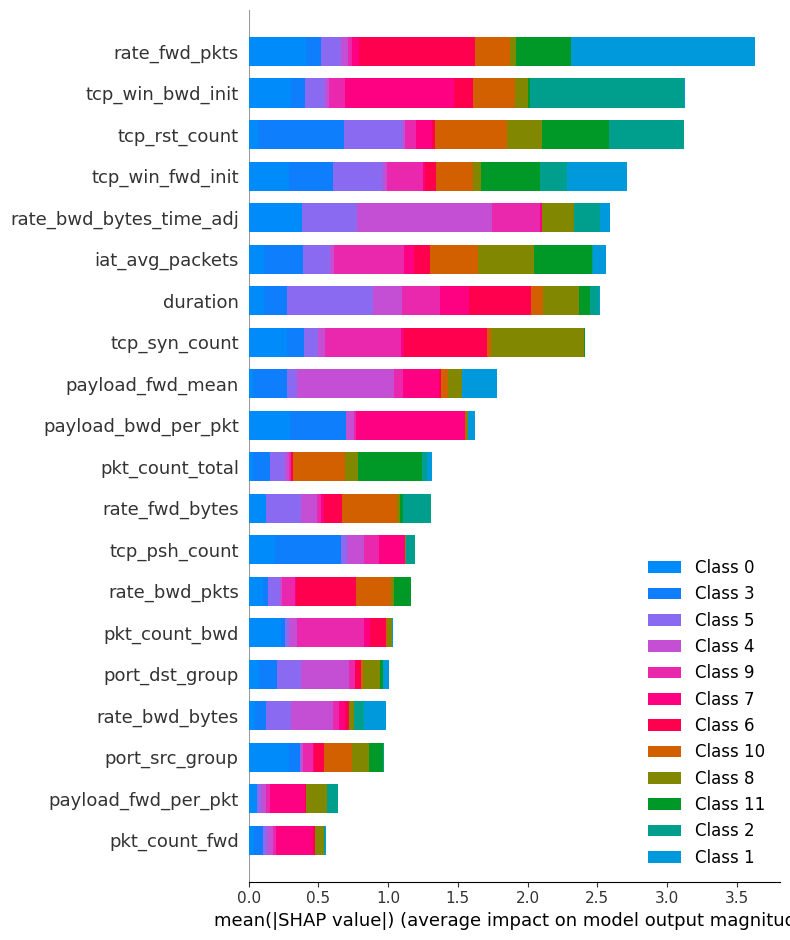

In [44]:
# Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ SHAP ÌèâÍ∑† Í∏∞Î∞ò summary plot
import matplotlib.pyplot as plt

shap.summary_plot(shap_value_train, X_train_sample, plot_type='bar')

In [45]:
# Ï†ÑÏ≤¥ Ìï¥ÏÑù (ÌÜµÍ≥Ñ Í∏∞Î∞ò)
top_features = df_shap_train.abs().mean(axis=0).sort_values(ascending=False)
print(top_features.head(10))

tcp_win_bwd_init           0.160551
rate_fwd_pkts              0.127516
payload_bwd_per_pkt        0.112255
tcp_syn_count              0.089999
rate_bwd_bytes_time_adj    0.086511
payload_fwd_mean           0.085549
pkt_count_total            0.080180
tcp_win_fwd_init           0.078155
duration                   0.075961
tcp_rst_count              0.075051
dtype: float64


ÌèâÍ∑† Ï†àÎåìÍ∞íÏù¥ ÌÅ¥ÏàòÎ°ù Î™®Îç∏ Ï†ÑÏ≤¥ ÏòàÏ∏°Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®

In [51]:
# LGBM Î™®Îç∏ÏóêÏÑú feature importance Í∞ÄÏ†∏Ïò§Í∏∞
# get_split_value_histogram()ÏùÄ gainÍ≥º split Îëò Îã§ Í∞ÄÎä•Ìï®
lgbm_importance_gain = pd.Series(model.feature_importance(importance_type='gain'),
                                 index=model.feature_name())

# SHAP Ï§ëÏöîÎèÑ ÌèâÍ∑† (Ïù¥ÎØ∏ Í≥ÑÏÇ∞Îêú df_shap_train ÌôúÏö©)
shap_importance_mean = df_shap_train.abs().mean()

# Í≥µÌÜµ feature Í∏∞Ï§Ä Ï†ïÎ†¨ Î∞è ÎπÑÍµêÌëú ÏÉùÏÑ±
common_features = lgbm_importance_gain.index.intersection(shap_importance_mean.index)

df_compare = pd.DataFrame({
    'LGBM_Importance_Gain': lgbm_importance_gain[common_features],
    'SHAP_Importance_MeanAbs': shap_importance_mean[common_features]
}).sort_values(by='SHAP_Importance_MeanAbs', ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
# print(df_compare.head(15))


# Ï§ëÏöîÎèÑ ÏàúÏúÑ Í≥ÑÏÇ∞
df_compare['Rank_SHAP'] = df_compare['SHAP_Importance_MeanAbs'].rank(ascending=False)
df_compare['Rank_LGBM'] = df_compare['LGBM_Importance_Gain'].rank(ascending=False)

# ÏàúÏúÑ Ï∞®Ïù¥ Í≥ÑÏÇ∞
df_compare['Rank_Diff'] = df_compare['Rank_LGBM'] - df_compare['Rank_SHAP']

# ÏàúÏúÑ Ï∞®Ïù¥ Í∏∞Ï§Ä Ï†ïÎ†¨ (ÏñëÏàò: LGBMÏóêÏÑú Í≥ºÎåÄÌèâÍ∞Ä, ÏùåÏàò: SHAPÏóêÏÑú Îçî Ï§ëÏöî)
df_diff = df_compare.sort_values('Rank_Diff', ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
print(df_diff[['LGBM_Importance_Gain', 'SHAP_Importance_MeanAbs', 'Rank_LGBM', 'Rank_SHAP', 'Rank_Diff']].head(15))


                         LGBM_Importance_Gain  SHAP_Importance_MeanAbs  \
payload_bwd_per_pkt              27937.697974                 0.112255   
payload_fwd_mean                 55161.130126                 0.085549   
pkt_count_bwd                    18034.822278                 0.036652   
pkt_count_total                  66524.057505                 0.080180   
rate_bwd_pkts                    53421.926319                 0.046380   
duration                         66389.052412                 0.075961   
rate_fwd_bytes                   52875.173976                 0.046333   
payload_fwd_per_pkt              23173.883280                 0.036447   
tcp_win_bwd_init                257494.414543                 0.160551   
rate_bwd_bytes_time_adj         148118.862175                 0.086511   
payload_bwd_mean                     0.000000                 0.000000   
tcp_syn_count                   237026.820990                 0.089999   
rate_fwd_pkts                   372792


  **Feature	Ï∞®Ïù¥ ÏöîÏ†ê	ÏùòÎØ∏**

  1. **payload_bwd_per_pkt**
    Rank_Diff = +15	LGBMÏóêÏÑúÎäî 18ÏúÑ, SHAPÏóêÏÑ† 3ÏúÑ (LGBMÏù¥ Í≥ºÏÜåÌèâÍ∞ÄÌï®, Ïã§Ï†ú ÏòàÏ∏° ÏòÅÌñ• ÌÅº)

  2. **payload_fwd_mean** Rank_Diff = +8	(Ïú†ÏÇ¨ÌïòÍ≤å SHAPÏù¥ Ï§ëÏöîÌïòÍ≤å ÌèâÍ∞Ä)

  3. **pkt_count_total**	Rank_Diff = +4	(Î™®Îç∏ÏùÄ split Ï†ÅÍ≤å ÌñàÏßÄÎßå, ÏòàÏ∏° Í≤∞Í≥ºÏóî Ï§ëÏöî)

  **ÌôúÏö© ÌåÅ**

  1. Rank_Diff > 5: LGBMÏóêÏÑú Í≥ºÏÜåÌèâÍ∞ÄÎêú Ï§ëÏöîÌïú Î≥ÄÏàò ‚Üí Ìï¥ÏÑù Í∞ïÌôîÏóê Ïú†Ïö©

  2. Rank_Diff < -5: SHAPÏóêÏÑúÎäî ÎÇÆÏùÄÎç∞ LGBMÏù¥ Í≥ºÎåÄÌèâÍ∞ÄÌïú Î≥ÄÏàò ‚Üí Î™®Îç∏ Ïã†Î¢∞ÎèÑ Ï†êÍ≤Ä Ìè¨Ïù∏Ìä∏

  3. Rank_Diff ‚âà 0: SHAPÍ≥º LGBMÏù¥ ÏùºÏπò ‚Üí ÏòàÏ∏° ÏòÅÌñ•Í≥º Î™®Îç∏ Íµ¨Ï°∞Í∞Ä Ïûò ÎßûÏùå

In [52]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# SHAP Í∏∞Î∞ò Ï§ëÏöîÎèÑ ÏÉÅÏúÑ NÍ∞ú Ï∂îÏ∂ú
N = 15  # ÏÉÅÏúÑ NÍ∞ú Î≥ÄÏàòÎ°ú Ï†úÌïú
shap_top_features = df_shap_train.abs().mean().sort_values(ascending=False).head(N).index.tolist()

# Ï§ëÏöî Î≥ÄÏàòÎßå Ï∂îÏ∂ú
X_train_top = X_train_res[shap_top_features]
X_val_top = X_val[shap_top_features]

# LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
lgb_train = lgb.Dataset(X_train_top, y_train_res)
lgb_val = lgb.Dataset(X_val_top, y_encoded_val, reference=lgb_train)

# ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (Í∏∞Î≥∏ Ïú†ÏßÄ)
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

# Î™®Îç∏ Ïû¨ÌïôÏäµ (Ï§ëÏöî feature Í∏∞Î∞ò)
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_val_top).argmax(axis=1)

print("SHAP Í∏∞Î∞ò Top-N FeatureÎ°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÑ±Îä•:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_encoded_val, y_pred):.4f}")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.113756
üìä SHAP Í∏∞Î∞ò Top-N FeatureÎ°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÑ±Îä•:
                 precision    recall  f1-score   support

         Benign       1.00      0.96      0.98      1758
         Botnet       0.44      0.80      0.57         5
           DDoS       1.00      1.00      1.00        94
FTP_Brute_Force       0.10      0.80      0.18        10
      GoldenEye       1.00      0.75      0.86         8
           Hulk       0.98      0.90      0.94       344
  Port_Scanning       0.99      0.98      0.99       159
SSH_Brute_Force       0.86      1.00      0.92         6
      Slow_HTTP       0.45      0.71      0.56         7
      Slowloris       0.18      0.60      0.27         5
Web_Brute_Force       0.50      0.67      0.57         3
        Web_XSS       0.70      1.00      0.82         7

       accuracy                           0.95      2406
      

In [53]:
# SHAPÍ≥º LGBM Ï§ëÏöîÎèÑ ÎπÑÍµê ÌÖåÏù¥Î∏îÏóêÏÑú Rank_Diff Í∏∞Ï§Ä
T = 5  # ÌóàÏö©ÎêòÎäî Ï§ëÏöîÎèÑ Ï∞®Ïù¥ ÏûÑÍ≥ÑÍ∞í

# 1. Ï°∞Í±¥: (1) SHAP ÏÉÅÏúÑ 15, ÎòêÎäî (2) Rank_Diff < -T (SHAP Í∏∞Ï§Ä Îçî Ï§ëÏöîÌï®)
shap_top_features = df_compare.sort_values('SHAP_Importance_MeanAbs', ascending=False).head(15).index
shap_emphasized = df_compare[df_compare['Rank_Diff'] < -T].index

selected_features = pd.Index(shap_top_features).union(shap_emphasized)

# Îç∞Ïù¥ÌÑ∞ Ï†úÌïú
X_train_top = X_train_res[selected_features]
X_val_top = X_val[selected_features]

# LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã
lgb_train = lgb.Dataset(X_train_top, y_train_res)
lgb_val = lgb.Dataset(X_val_top, y_encoded_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 7. ÌèâÍ∞Ä
y_pred = model.predict(X_val_top).argmax(axis=1)

print("SHAP + LGBM Ï°∞Ìï© Í∏∞Î∞ò Î≥ÄÏàò ÏÑ†ÌÉù Í≤∞Í≥º:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_encoded_val, y_pred):.4f}")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.108679
üìä SHAP + LGBM Ï°∞Ìï© Í∏∞Î∞ò Î≥ÄÏàò ÏÑ†ÌÉù Í≤∞Í≥º:
                 precision    recall  f1-score   support

         Benign       0.99      0.96      0.98      1758
         Botnet       0.44      0.80      0.57         5
           DDoS       1.00      1.00      1.00        94
FTP_Brute_Force       0.25      0.70      0.37        10
      GoldenEye       0.88      0.88      0.88         8
           Hulk       0.92      0.97      0.94       344
  Port_Scanning       1.00      0.98      0.99       159
SSH_Brute_Force       0.86      1.00      0.92         6
      Slow_HTTP       0.44      0.57      0.50         7
      Slowloris       0.23      0.60      0.33         5
Web_Brute_Force       0.50      0.67      0.57         3
        Web_XSS       0.70      1.00      0.82         7

       accuracy                           0.96      2406
      macro 

## 9.[Ï∂îÍ∞Ä Î™®Îç∏] XGBoost

*Ï∞∏Í≥†

1.   Ìï¥Îãπ ÏÑ∏ÏÖòÎ∂ÄÌÑ∞Îäî Í∏∞Ï°¥Ïùò ÏÉÅÎã®ÏóêÏÑú ÏµúÏ†ÅÏùò Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î∞è Ï†ÑÏ≤òÎ¶¨Ïóê ÎåÄÌïú Ï†ïÎ≥¥Îäî Í∑∏ÎåÄÎ°ú ÌôúÏö©ÌïòÎ©∞ Î™®Îç∏Îßå Î≥ÄÍ≤ΩÎê©ÎãàÎã§.
2.   ÌòÑÏû¨ ÏÉÅÌÉú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï SMOTE Ï†ÅÏö©


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. XGBoostÏö© DMatrix ÏÉùÏÑ±
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dval = xgb.DMatrix(X_val, label=y_encoded_val)

# 2. ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

"""
xgb_params = {
    'objective': 'multi:softprob',       # Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÌôïÎ•† Ï∂úÎ†•
    'num_class': len(np.unique(y_train_res)),
    'eval_metric': 'mlogloss',           # ÏÜêÏã§ Í∏∞Ï§Ä
    'learning_rate': 0.1,                # ÌïôÏäµÎ•† (0.05~0.2 ÌäúÎãù Í∞ÄÎä•)
    'max_depth': 6,                      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú (5~9 ÏÇ¨Ïù¥ Ï∂îÏ≤ú)
    'min_child_weight': 3,               # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (3~10 ÏÇ¨Ïù¥ ÌäúÎãù)
    'subsample': 0.8,                    # ÌïôÏäµ ÏÉòÌîå ÏÉòÌîåÎßÅ ÎπÑÏú® (0.7~1.0)
    'colsample_bytree': 0.8,             # ÌîºÏ≤ò ÏÉòÌîåÎßÅ ÎπÑÏú® (0.7~1.0)
    'lambda': 1.0,                       # L2 Ï†ïÍ∑úÌôî (ridge)
    'alpha': 0.0,                        # L1 Ï†ïÍ∑úÌôî (lasso)
    'seed': 42,
    'verbosity': 0
}
"""


xgb_params = {
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train_res)),
    'eval_metric': 'mlogloss',
    'seed': 42,
    'verbosity': 0
}

# 3. Î™®Îç∏ ÌïôÏäµ
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# 4. ÏòàÏ∏°
y_pred_xgb = xgb_model.predict(dval).argmax(axis=1)

# 5. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("XGBoost Report:")
print(classification_report(y_encoded_val, y_pred_xgb, target_names=le.classes_))
print(f"XGBoost Accuracy: {accuracy_score(y_encoded_val, y_pred_xgb):.4f}")
